# BUSINESS UNDERSTANDING

Data disediakan oleh Home Credit, sebuah layanan yang didedikasikan untuk menyediakan jalur kredit (pinjaman) kepada populasi yang tidak memiliki rekening bank. Prediksi dibuat untuk menentukan apakah klien akan melunasi pinjaman atau mengalami kesulitan. Dilakukan identifikasi karakteristik nasabah yang mengalami kesulitan dalam mengembalikan pinjaman dengan menerapkan algoritma pembelajaran mesin untuk memprediksi kemampuan pembayaran klien.
Terdapat 7 sumber data:
1. application train/test : berisi informasi tentang setiap aplikasi pinjaman di Home Credit. Pada data train terdapat ‘TARGET’ dimana 0=pinjaman telah dilunasi, 1=pinjaman belum dilunasi.
2. bureau : data mengenai kredit klien dari lembaga keuangan lain.
3. bureau_balance : data bulanan tentang kredit sebelumnya di biro.
4. previous_application : aplikasi sebelumnya untuk pinjaman di Home Credit klien yang memiliki pinjaman dalam data aplikasi. 
5. POS_CASH_BALANCE : data bulanan tentang titik penjualan sebelumnya atau pinjaman tunai yang dimiliki klien dengan Home Credit.
6. credit_card_balance : data bulanan tentang kartu kredit sebelumnya yang dimiliki klien dengan Home Credit
7. installments_payment : riwayat pembayaran untuk pinjaman sebelumnya di Home Credit.

# DATA UNDERSTANDING

In [ ]:
# Mengimpor package yang diperlukan
# data manipulation
import pandas as pd
import numpy as np

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest #feature selection
from sklearn.feature_selection import chi2
from sklearn.utils import resample #re-sampling
from sklearn.model_selection import train_test_split #data splitting
from sklearn.preprocessing import StandardScaler #normalize features
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.naive_bayes import GaussianNB #gaussian naive bayes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor
from sklearn.neural_network import MLPClassifier #neural network
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_auc_score #roc score

# File system management
import os
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Training data
app_train = pd.read_csv('application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (33011, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Testing data features
app_test = pd.read_csv('application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (32706, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print('Data types: \n')
app_train.info(verbose=True)

Data types: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33011 entries, 0 to 33010
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int6

In [ ]:
# Visualization
train = app_train.copy()

## Univariate

In [ ]:
# Univariate : The Number of Customers Based on Their Repayment Abilities
decode_map = {0: "No Payment Difficulties", 1: "Payment Difficulties"}
def decode_sentiment(label):
    return decode_map[int(label)]

train['TARGET'] = train['TARGET'].apply(lambda x: decode_sentiment(x))

In [ ]:
target_grp = (train[['TARGET']]
                .groupby("TARGET")
                .agg(COUNT=("TARGET","count"))
                .sort_values(by=["COUNT"],ascending=False)
                .reset_index()
                )

target_grp.style.background_gradient(cmap='Blues')

,TARGET,COUNT
0,No Payment Difficulties,30349
1,Payment Difficulties,2662


In [ ]:
grp = train['TARGET'].value_counts(normalize=True)
grp.reset_index().style.background_gradient(cmap='Blues')

,index,TARGET
0,No Payment Difficulties,0.919360
1,Payment Difficulties,0.080640


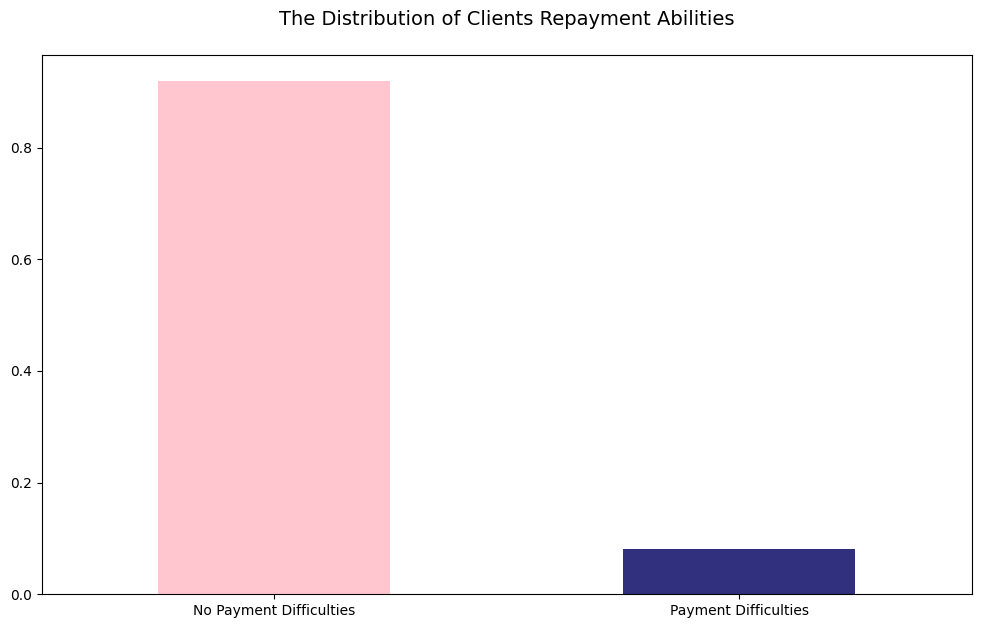

In [ ]:
fig = plt.figure(figsize = (12,7))
grp.plot(kind='bar', color= ['pink','midnightblue'], alpha = 0.9, rot=0)
plt.title('The Distribution of Clients Repayment Abilities\n', fontsize=14)
plt.show()

Ada sekitar 91% pinjaman yang setara dengan sekitar 282K dengan TARGET = 0, yang menunjukkan bahwa klien tidak memiliki masalah dalam membayar kembali pinjaman pada waktu tertentu. Sementara hanya 9% dari total pinjaman (sekitar 24 ribu pemohon) dalam dataset ini melibatkan klien yang bermasalah dalam mengembalikan pinjaman.

## Bivariate : Categorical Features Vs Target

<Axes: title={'center': '\nClients Repayment Abilities By Realty Ownership Status\n'}, xlabel='FLAG_OWN_REALTY', ylabel='count'>

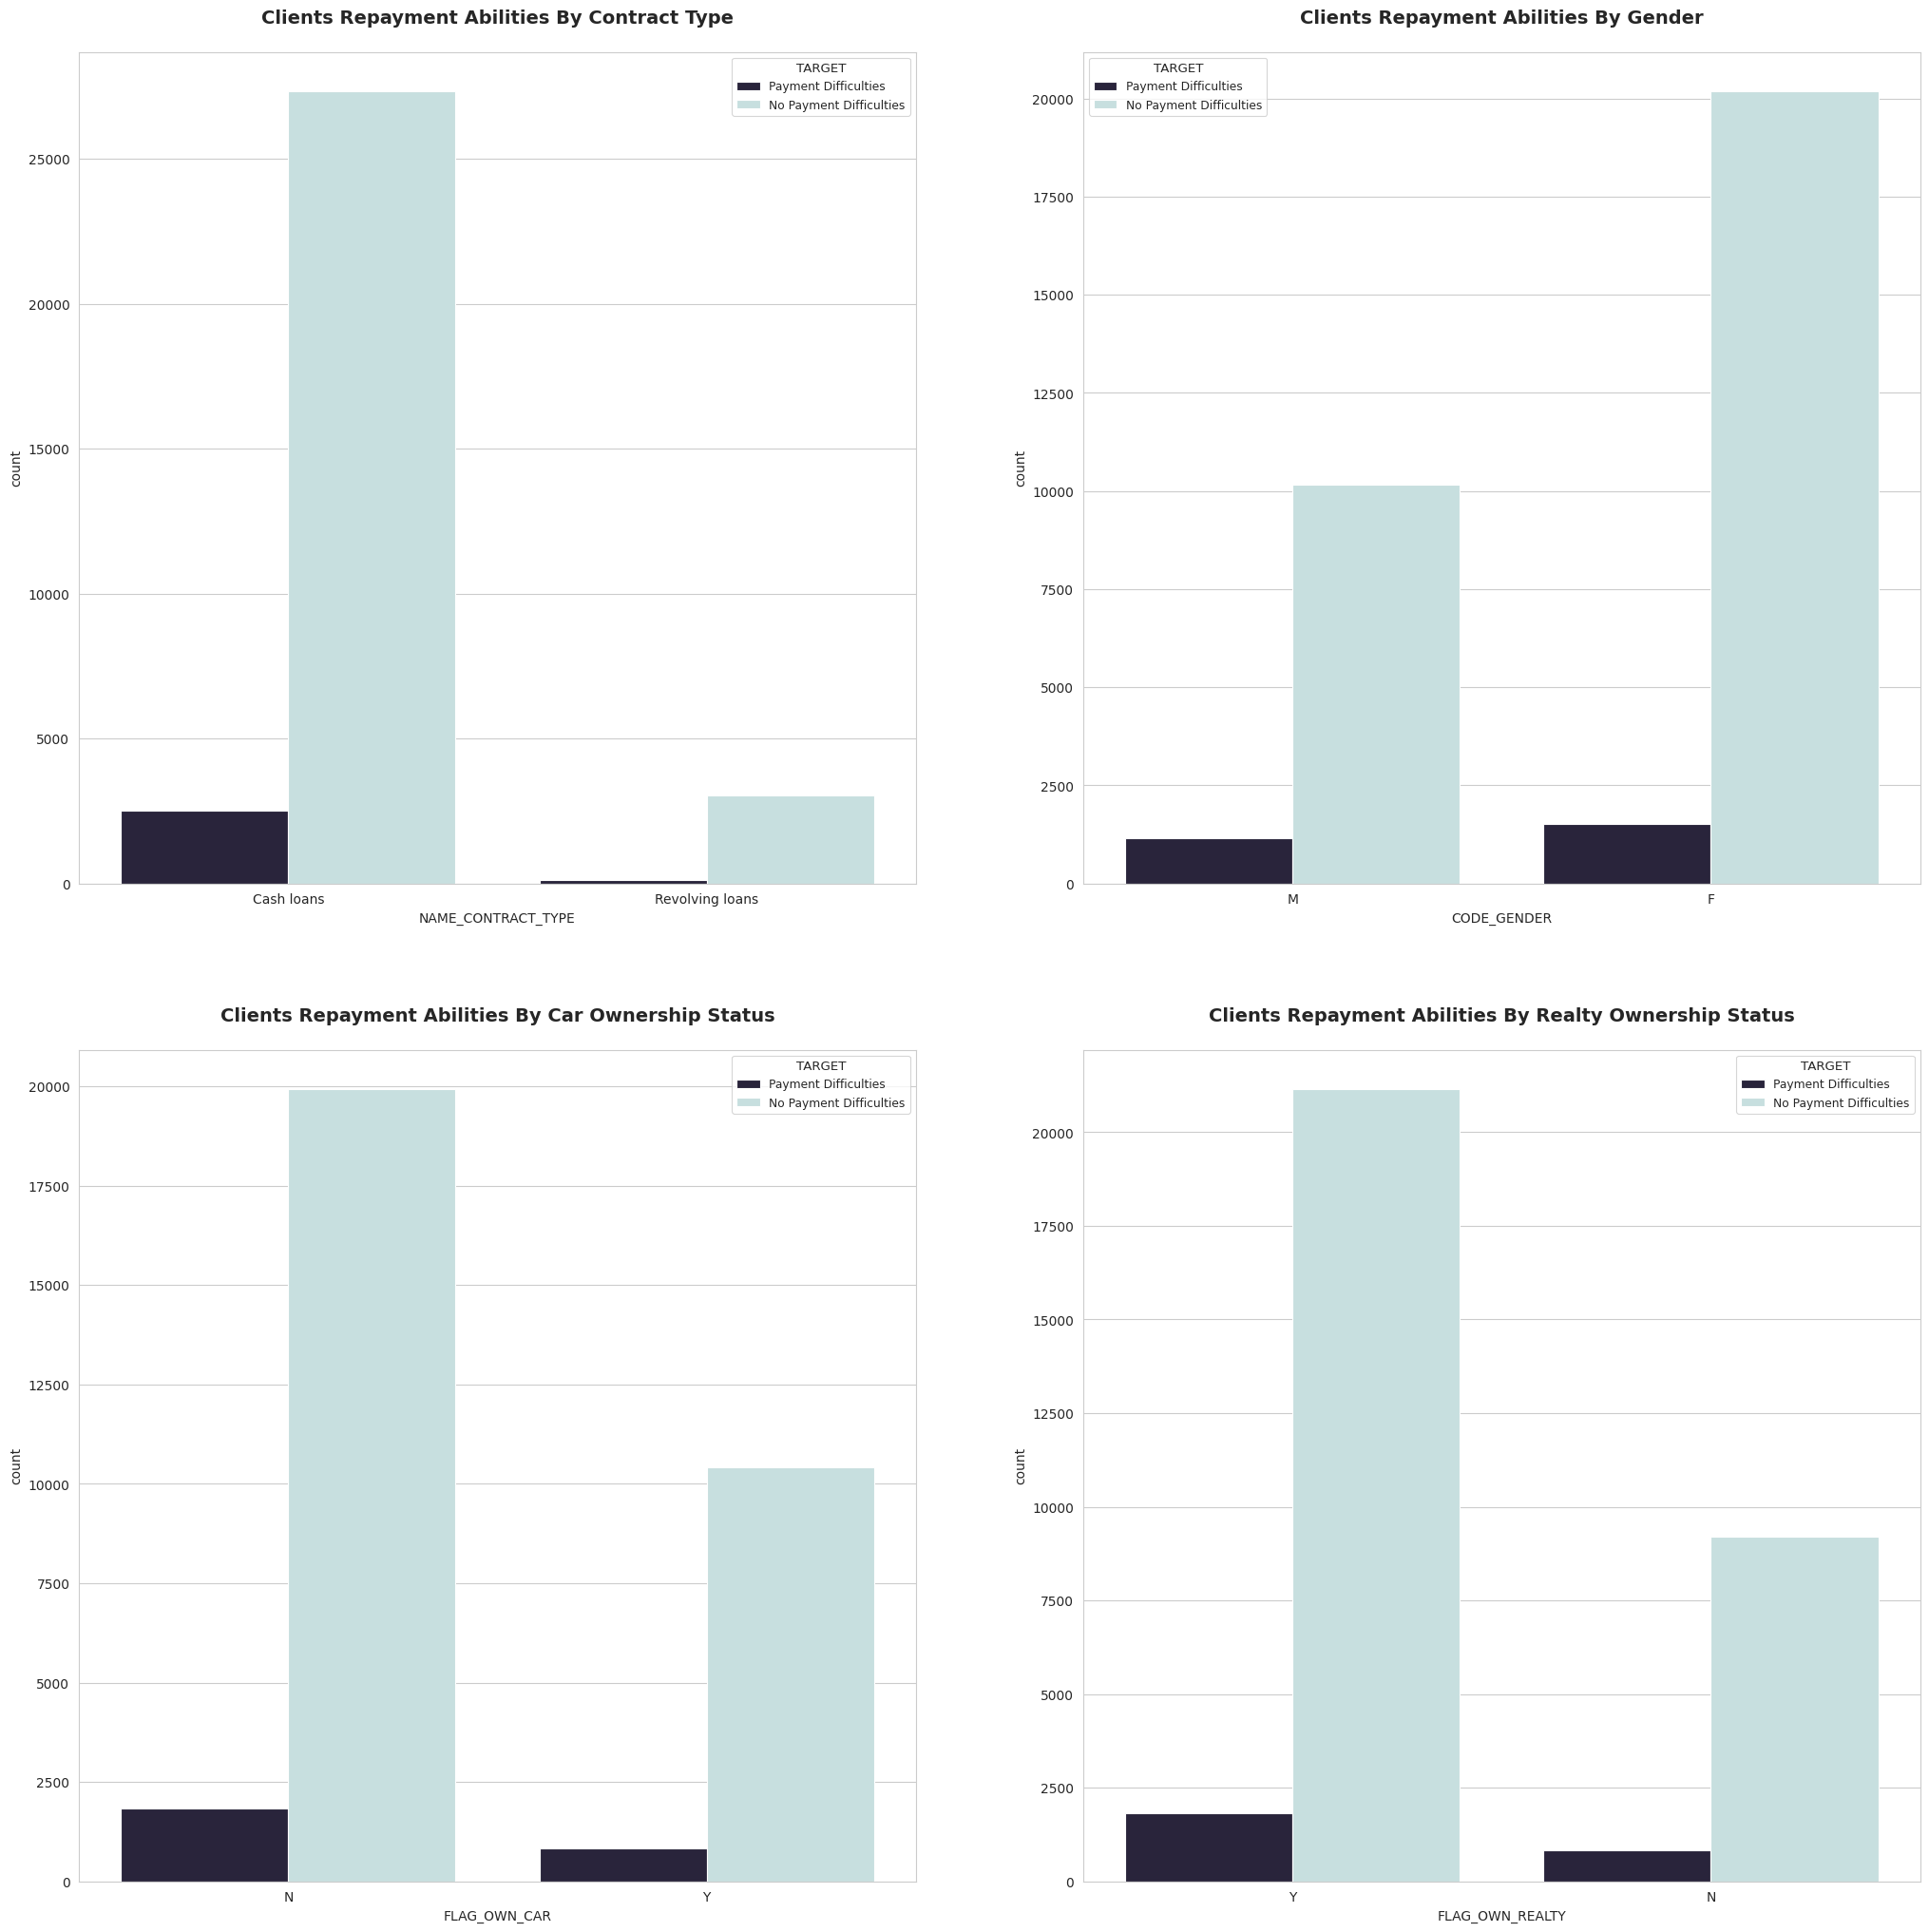

In [ ]:
# visualization pt 1
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(25,25))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Clients Repayment Abilities By Contract Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_CONTRACT_TYPE', data = train, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[0][0])

ax[0][1].set_title('Clients Repayment Abilities By Gender\n', fontweight='bold', fontsize=14)
sns.countplot(x='CODE_GENDER', data = train, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[0][1])

ax[1][0].set_title('\nClients Repayment Abilities By Car Ownership Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_CAR', data = train, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[1][0])

ax[1][1].set_title('\nClients Repayment Abilities By Realty Ownership Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_REALTY', data = train, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[1][1])

### Contract Type vs Target

In [ ]:
# Contract Type Vs Target
ct = train.groupby(by=['NAME_CONTRACT_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Contract Type')
ct.sort_values(by='SK_ID_CURR', ascending=False)
ct.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Contract Type


,NAME_CONTRACT_TYPE,TARGET,SK_ID_CURR
0,Cash loans,No Payment Difficulties,27325
1,Cash loans,Payment Difficulties,2524
2,Revolving loans,No Payment Difficulties,3024
3,Revolving loans,Payment Difficulties,138


Cash loans (pinjaman tunai) dengan sekitar 29 ribu pinjaman merupakan mayoritas dari total pinjaman dalam kumpulan data ini. Revolving loans (pinjaman bergulir) memiliki jumlah yang jauh lebih rendah sekitar 3 ribu dibandingkan dengan pinjaman tunai.

### Gender vs Target

In [ ]:
# Gender Vs Target
train['CODE_GENDER'] = train['CODE_GENDER'].replace(['F','M'],['Female','Male'])
gt = train.groupby(by=['CODE_GENDER','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Gender')
gt.sort_values(by='SK_ID_CURR', ascending=False)
gt.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Gender


,CODE_GENDER,TARGET,SK_ID_CURR
0,Female,No Payment Difficulties,20176
1,Female,Payment Difficulties,1514
2,Male,No Payment Difficulties,10173
3,Male,Payment Difficulties,1148


In [ ]:
app_train[['CODE_GENDER','TARGET']].groupby(['CODE_GENDER'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,CODE_GENDER,TARGET
1,M,0.101404
0,F,0.069802


Dapat dilihat bahwa sebagian besar yang mengajukan pinjaman adalah perempuan. Secara total, ada sekitar 21690 aplikasi pinjaman yang diajukan oleh perempuan, dan sekitar 3162 aplikasi diajukan oleh laki-laki.

Namun, persentase yang lebih besar (sekitar 10.14% dari total) laki-laki memiliki masalah dalam membayar pinjaman dibandingkan dengan nasabah perempuan (sekitar 6.98%).

### Car Ownership Status vs Target

In [ ]:
# Car Ownership Status Vs Target
train['FLAG_OWN_CAR'] = train['FLAG_OWN_CAR'].replace(['Y','N'],['Yes','No'])
ot = train.groupby(by=['FLAG_OWN_CAR','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Car Ownership Status')
ot.sort_values(by='SK_ID_CURR', ascending=False)
ot.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Car Ownership Status


,FLAG_OWN_CAR,TARGET,SK_ID_CURR
0,No,No Payment Difficulties,19922
1,No,Payment Difficulties,1840
2,Yes,No Payment Difficulties,10427
3,Yes,Payment Difficulties,822


In [ ]:
#app_train[['FLAG_OWN_CAR','TARGET']].groupby(['FLAG_OWN_CAR'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

Sebagian besar klien tidak memiliki mobil.

Nasabah yang memiliki mobil (sekitar 8%) mengalami kesulitan dalam pengembalian pinjaman dibandingkan dengan nasabah yang tidak memiliki mobil (sekitar 7%). Namun, perbedaannya tidak terlalu signifikan.

### Realty Ownership Status vs Target

In [ ]:
# Realty Ownership Status vs Target
train['FLAG_OWN_REALTY'] = train['FLAG_OWN_REALTY'].replace(['Y','N'],['Yes','No'])
rt = train.groupby(by=['FLAG_OWN_REALTY','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Realty Ownership Status')
rt.sort_values(by='SK_ID_CURR', ascending=False)
rt.style.background_gradient(cmap='Blues')

In [ ]:
app_train[['FLAG_OWN_REALTY','TARGET']].groupby(['FLAG_OWN_REALTY'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

Sebagian besar klien memiliki flat / rumah.

Nasabah yang memiliki rumah/flat (sekitar 8%) mengalami kesulitan dalam pengembalian pinjaman dibandingkan nasabah yang tidak memiliki rumah/flat (sekitar 7%). Namun, perbedaannya tidak terlalu signifikan.

In [ ]:
# Suite Type, Income Type, Education Type, and Family Status
# visualization pt. 2
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(25,35))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Clients Repayment Abilities By Suite Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_TYPE_SUITE', data = train, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[0][0])

ax[0][1].set_title('Clients Repayment Abilities By Income Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_INCOME_TYPE', data = train, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[0][1])

ax[1][0].set_title('\nClients Repayment Abilities By Education Type)\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_EDUCATION_TYPE', data = train, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[1][0])

ax[1][1].set_title('\nClients Repayment Abilities By Family Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_FAMILY_STATUS', data = train, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[1][1])

###Suite Type vs Target

In [ ]:
# Suite type vs target
st = train.groupby(by=['NAME_TYPE_SUITE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Suite Type')
st.sort_values(by='SK_ID_CURR', ascending=False)
st.style.background_gradient(cmap='Blues')

In [ ]:
app_train[['NAME_TYPE_SUITE','TARGET']].groupby(['NAME_TYPE_SUITE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

###Income Type vs Target

In [ ]:
# Income Type vs target
rt = train.groupby(by=['NAME_INCOME_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Income Type')
rt.sort_values(by='SK_ID_CURR', ascending=False)
rt.style.background_gradient(cmap='Blues')

In [ ]:
app_train[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], 

Dapat dilihat bahwa klien yang memiliki penghasilan  telah mengajukan sebagian besar pinjaman.

Nasabah dengan jenis penghasilan pengusaha dan mahasiswa tidak mengalami kesulitan dalam mengembalikan pinjamannya.

Sedangkan klien dengan jenis penghasilan cuti hamil dan menganggur memiliki persentase tertinggi dengan TARGET = 1 mengalami kendala dalam pengembalian pinjaman.

### Education Type vs Target

In [ ]:
# education type vs target
et = train.groupby(by=['NAME_EDUCATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Education Type')
et.sort_values(by='SK_ID_CURR', ascending=False)
et.style.background_gradient(cmap='Blues')

In [ ]:
app_train[['NAME_EDUCATION_TYPE','TARGET']].groupby(['NAME_EDUCATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

Sejumlah besar pengajuan diajukan oleh klien secondary education kemudian diikuti dengan klien higer education.

Klien lower secondary memiliki persentase tertinggi (sekitar 10%) dari TARGET = 1 (mengalami kendala dalam pengembalian pinjaman).

### Family Status vs Target

In [ ]:
# family status vs target
ft = train.groupby(by=['NAME_FAMILY_STATUS','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Family Status')
ft.sort_values(by='SK_ID_CURR', ascending=False)
ft.style.background_gradient(cmap='Blues')

In [ ]:
app_train[['NAME_FAMILY_STATUS','TARGET']].groupby(['NAME_FAMILY_STATUS'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

Dapat dilihat bahwa klien yang sudah menikah mengajukan sebagian besar pinjaman.
Klien dengan status keluarga perkawinan sipil dan lajang memiliki persentase tertinggi dari klien yang bermasalah dalam mengembalikan pinjaman.

### Housing Type vs Target

In [ ]:
ht = train.groupby(by=['NAME_HOUSING_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Housing Type')
ht.sort_values(by='SK_ID_CURR', ascending=False)
ht.style.background_gradient(cmap='Blues')

In [ ]:

app_train[['NAME_HOUSING_TYPE','TARGET']].groupby(['NAME_HOUSING_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_HOUSING_TYPE,TARGET
5,With parents,0.118957
4,Rented apartment,0.105788
2,Municipal apartment,0.080833
1,House / apartment,0.078273
0,Co-op apartment,0.073171
3,Office apartment,0.070632


Terlihat bahwa nasabah dengan tipe rumah apartemen sewa memiliki persentase kesulitan tertinggi dalam kesulitan dalam melunasi pinjamannya.

Text(0.5, 0, '\nHousing Type')

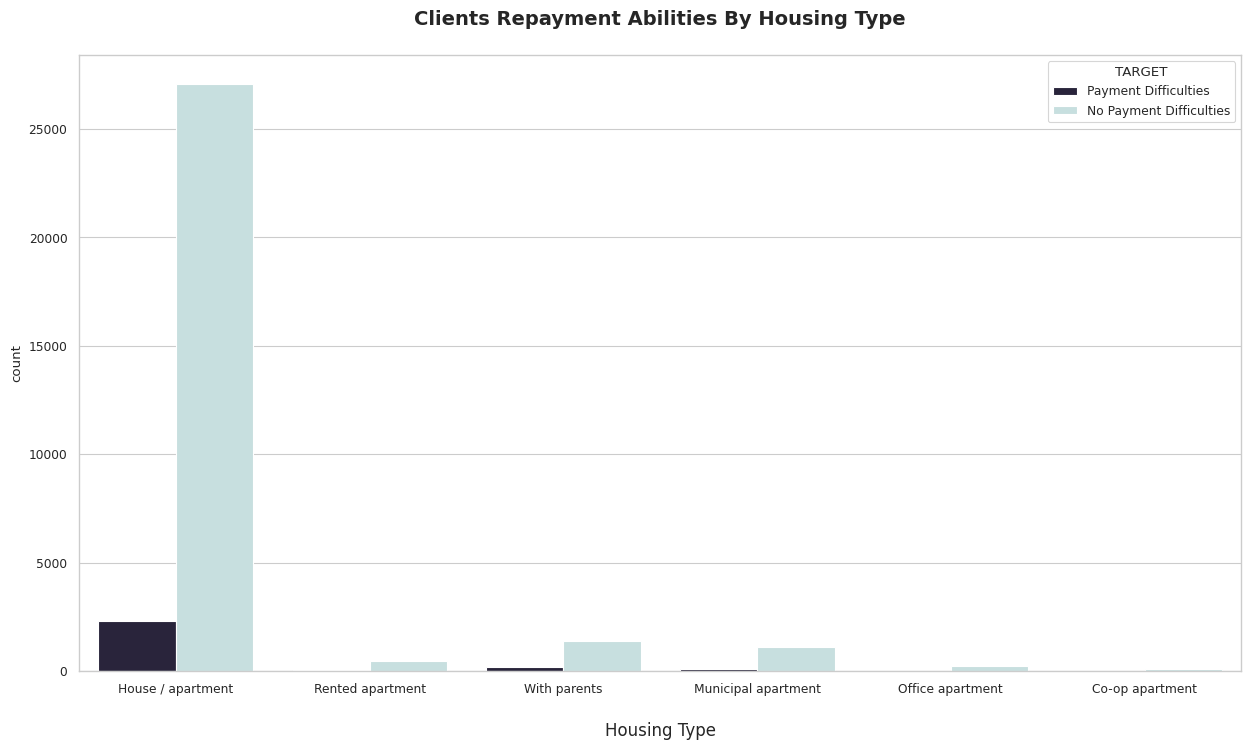

In [ ]:
# visualization
plt.figure(figsize=(15,8))
fig = sns.countplot(x='NAME_HOUSING_TYPE', data = train, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r')
plt.title('Clients Repayment Abilities By Housing Type\n', fontweight='bold', fontsize=14)
plt.xlabel('\nHousing Type', fontsize=12)

Klien yang tinggal di Rumah/apartemen memiliki jumlah pengajuan pinjaman tertinggi 

### Occupation Type vs Target

In [ ]:
# Occupation Type Vs Target
ot = train.groupby(by=['OCCUPATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Occupation Type')
ot.sort_values(by='SK_ID_CURR', ascending=False)
ot.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Occupation Type


,OCCUPATION_TYPE,TARGET,SK_ID_CURR
0,Accountants,No Payment Difficulties,997
1,Accountants,Payment Difficulties,56
2,Cleaning staff,No Payment Difficulties,427
3,Cleaning staff,Payment Difficulties,49
4,Cooking staff,No Payment Difficulties,556
5,Cooking staff,Payment Difficulties,66
6,Core staff,No Payment Difficulties,2770
7,Core staff,Payment Difficulties,180
8,Drivers,No Payment Difficulties,1774
9,Drivers,Payment Difficulties,216


In [ ]:
app_train[['OCCUPATION_TYPE','TARGET']].groupby(['OCCUPATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,OCCUPATION_TYPE,TARGET
9,Low-skill Laborers,0.181818
17,Waiters/barmen staff,0.119718
5,HR staff,0.112903
4,Drivers,0.108543
2,Cooking staff,0.106109
16,Security staff,0.105263
1,Cleaning staff,0.102941
8,Laborers,0.097520
14,Sales staff,0.095886
13,Realty agents,0.095238


Sejumlah besar pengajuan diajukan oleh klien yang bekerja sebagai Buruh.

Terlihat bahwa klien dengan jenis pekerjaan Low-skill Laborers memiliki persentase tertinggi (sekitar 18%) dengan TARGET = 1 (mengalami kendala dalam pengembalian pinjaman).

### Process Day vs Target

In [ ]:
# Process Day Vs Target
pt = train.groupby(by=['WEEKDAY_APPR_PROCESS_START','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Process Day')
pt.sort_values(by='SK_ID_CURR', ascending=False)
pt.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Process Day


,WEEKDAY_APPR_PROCESS_START,TARGET,SK_ID_CURR
0,FRIDAY,No Payment Difficulties,5038
1,FRIDAY,Payment Difficulties,427
2,MONDAY,No Payment Difficulties,5037
3,MONDAY,Payment Difficulties,445
4,SATURDAY,No Payment Difficulties,3353
5,SATURDAY,Payment Difficulties,282
6,SUNDAY,No Payment Difficulties,1558
7,SUNDAY,Payment Difficulties,138
8,THURSDAY,No Payment Difficulties,4942
9,THURSDAY,Payment Difficulties,457


In [ ]:
app_train[['WEEKDAY_APPR_PROCESS_START','TARGET']].groupby(['WEEKDAY_APPR_PROCESS_START'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,WEEKDAY_APPR_PROCESS_START,TARGET
4,THURSDAY,0.084645
5,TUESDAY,0.081527
3,SUNDAY,0.081368
1,MONDAY,0.081175
6,WEDNESDAY,0.079529
0,FRIDAY,0.078134
2,SATURDAY,0.077579


Text(0.5, 0, '\nProcess Day')

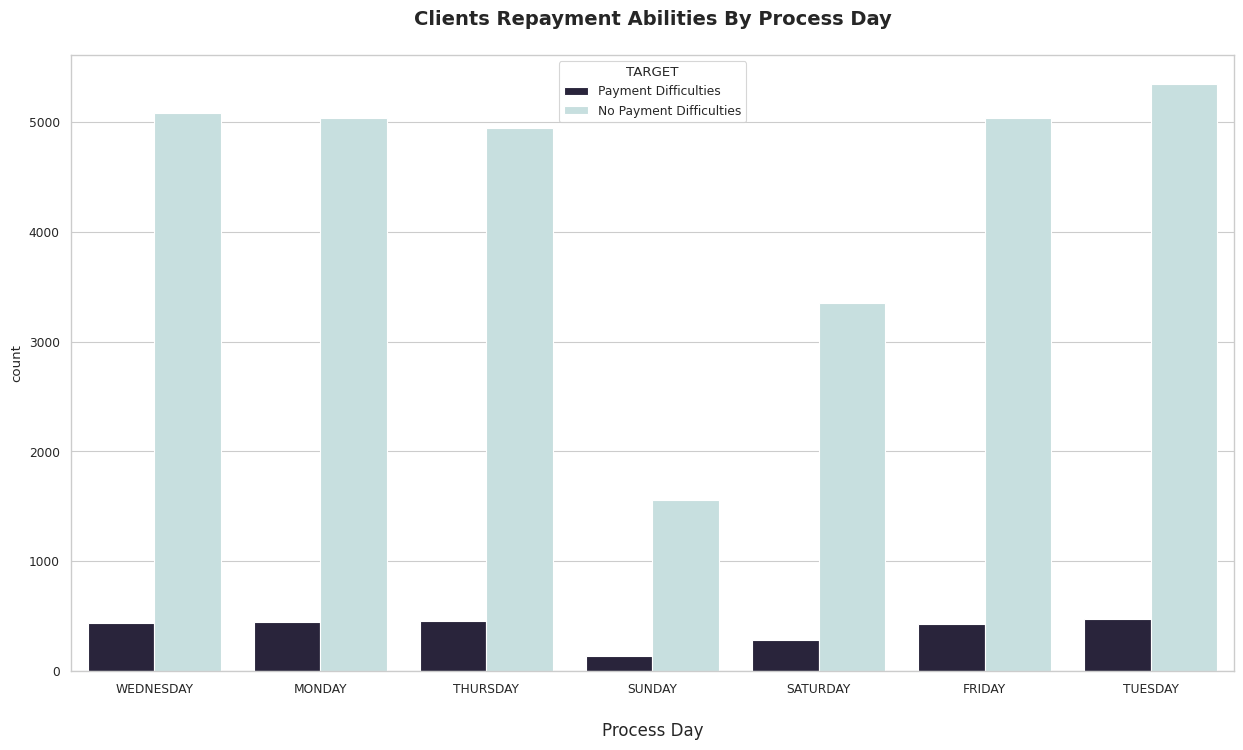

In [ ]:
#  visualization
plt.figure(figsize=(15,8))
fig = sns.countplot(x='WEEKDAY_APPR_PROCESS_START', data = train, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r')
plt.title('Clients Repayment Abilities By Process Day\n', fontweight='bold', fontsize=14)
plt.xlabel('\nProcess Day', fontsize=12)

Terlihat bahwa setiap hari processing day hampir sama (sekitar 7% - 8%) pada TARGET = 1 yaitu (mengalami kendala dalam pengembalian pinjaman).

### Organization Type vs Target

In [ ]:
# Organization Type Vs Target
tt = train.groupby(by=['ORGANIZATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Suite Type')
tt.sort_values(by='SK_ID_CURR', ascending=False)
tt.style.background_gradient(cmap='Blues')


Clients Repayment Abilities By Suite Type


,ORGANIZATION_TYPE,TARGET,SK_ID_CURR
0,Advertising,No Payment Difficulties,37
1,Advertising,Payment Difficulties,5
2,Agriculture,No Payment Difficulties,213
3,Agriculture,Payment Difficulties,31
4,Bank,No Payment Difficulties,266
5,Bank,Payment Difficulties,14
6,Business Entity Type 1,No Payment Difficulties,564
7,Business Entity Type 1,Payment Difficulties,55
8,Business Entity Type 2,No Payment Difficulties,1038
9,Business Entity Type 2,Payment Difficulties,80


In [ ]:
app_train[['ORGANIZATION_TYPE','TARGET']].groupby(['ORGANIZATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)


,ORGANIZATION_TYPE,TARGET
18,Industry: type 13,0.333333
49,Trade: type 5,0.166667
36,Realtor,0.146341
23,Industry: type 6,0.142857
29,Legal Services,0.129032
1,Agriculture,0.127049
38,Restaurant,0.121547
40,Security,0.121469
54,Transport: type 3,0.121212
0,Advertising,0.119048


Dapat dilihat bahwa klien dengan tipe organisasi industry: type 13 memiliki persentase tertinggi (sekitar 33%) dari TARGET = 1 (mengalami kendala dalam pengembalian pinjaman).

## Bivariate: Numerical Features Vs Target

### Amount Credit of the Loan vs Target

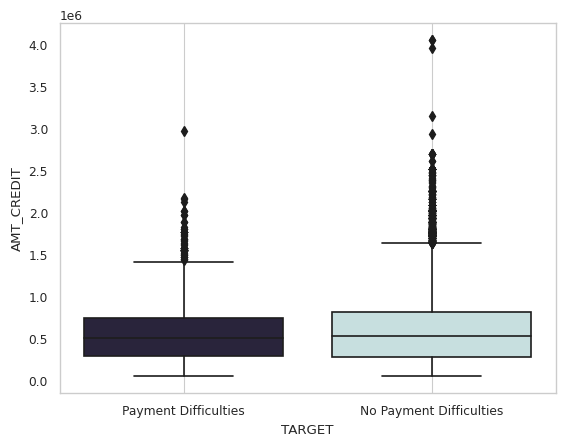

In [ ]:
# Amount Credit of the Loan Vs Target
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=train, palette = 'ch:start=0.2,rot=-.3_r')
plt.grid()
plt.show()

Terlihat bahwa nilai median jumlah kredit nasabah yang tidak mengalami kesulitan pembayaran sedikit lebih besar dibandingkan dengan nilai median nasabah yang mengalami kesulitan pembayaran. Artinya, nasabah dengan jumlah kredit yang lebih tinggi memiliki peluang yang sedikit lebih tinggi untuk mampu membayar kembali pinjamannya dibandingkan dengan nasabah dengan jumlah kredit yang lebih rendah.

### Amount Income vs Target

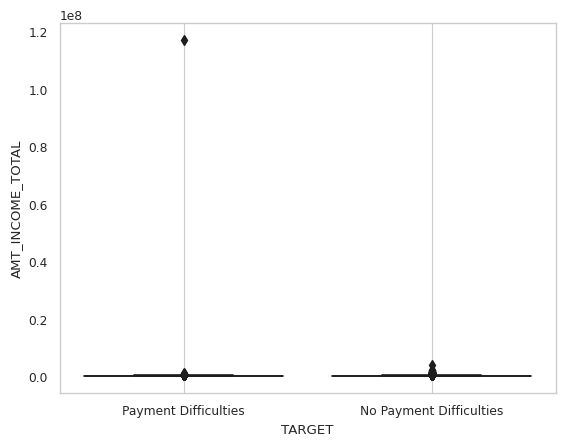

In [ ]:
# Amount Income Vs Target
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=train, palette = 'ch:start=0.2,rot=-.3_r')
plt.grid()
plt.show()

Terlihat bahwa baik klien yang mengalami kesulitan pembayaran maupun klien yang tidak mengalami kesulitan pembayaran, sebagian besar memiliki nilai yang sama. Namun, dengan meningkatnya pendapatan klien, kemungkinan bahwa klien tidak akan mengalami kesulitan membayar kembali pinjaman juga meningkat.

### Age vs Target

In [ ]:
# Age vs target
no_age = app_train[app_train['TARGET']==0]['DAYS_BIRTH'].values/-365
yes_age = app_train[app_train['TARGET']==1]['DAYS_BIRTH'].values/-365

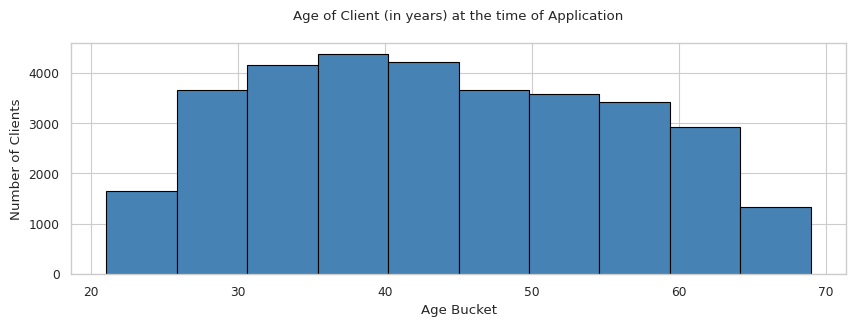

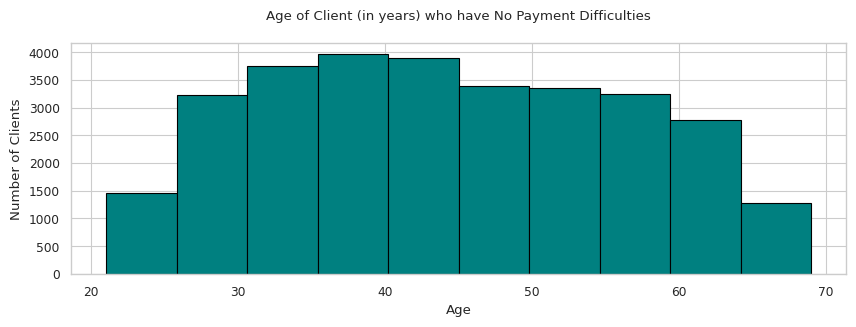

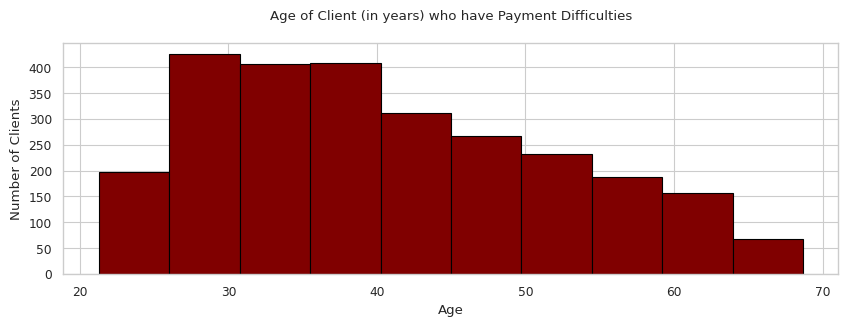

In [ ]:
plt.figure(figsize=(10,3))
plt.hist(app_train['DAYS_BIRTH'].values/-365, bins=10, edgecolor='black', color='steelblue')
plt.title('Age of Client (in years) at the time of Application\n')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(no_age, bins=10, edgecolor='black', color='teal')
plt.title('Age of Client (in years) who have No Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(yes_age, bins=10, edgecolor='black', color='maroon')
plt.title('Age of Client (in years) who have Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

Sebagian besar nasabah yang mengajukan pinjaman berada pada rentang usia 35-40 tahun, diikuti nasabah pada rentang usia 40-45 tahun. Sementara itu, jumlah klien berusia <25 tahun atau usia >65 tahun sangat rendah.

Klien yang tidak mengalami kesulitan pembayaran adalah klien dengan rentang usia 35-45 tahun. Sedangkan klien yang mengalami kesulitan pembayaran adalah klien dengan rentang usia 25-35 tahun.

## Multivariate Visualization

### Grouped by Realty Ownership Status

#### Car Ownership Status, The Number of Children, Target, and House/Flat Ownership Status

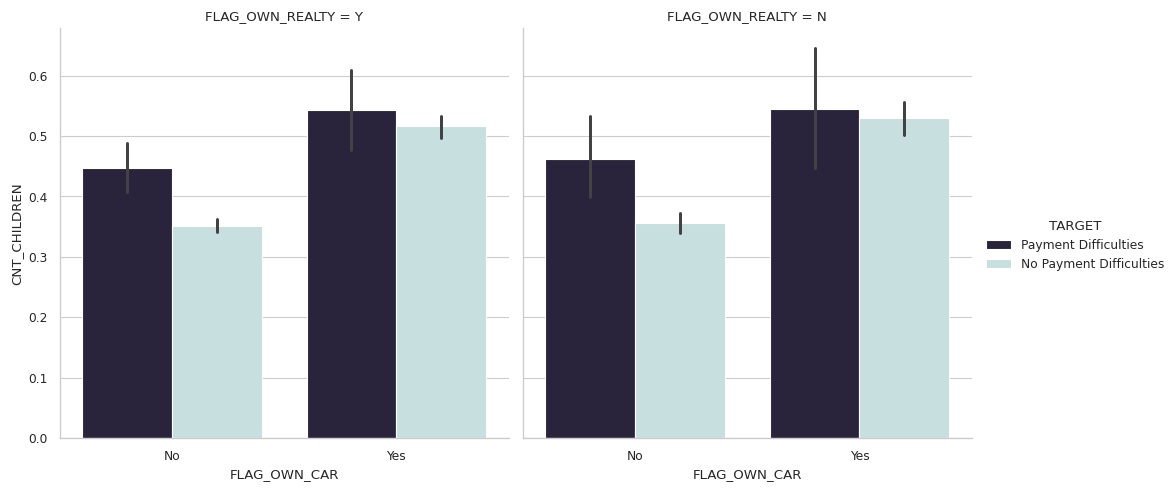

In [ ]:
# 1. Car Ownership Status, The Number of Children, Target, and House/Flat Ownership Status
sns.catplot(x = 'FLAG_OWN_CAR',
            y = 'CNT_CHILDREN', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_REALTY', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train)
plt.show()

Klien yang memiliki mobil dan rumah/flat memiliki masalah dalam mengembalikan pinjaman untuk jumlah anak yang tinggi dibandingkan dengan klien yang tidak memiliki rumah/flat.

#### Income Type, Amount of Goods Price, Target, and House/Flat Ownership Status

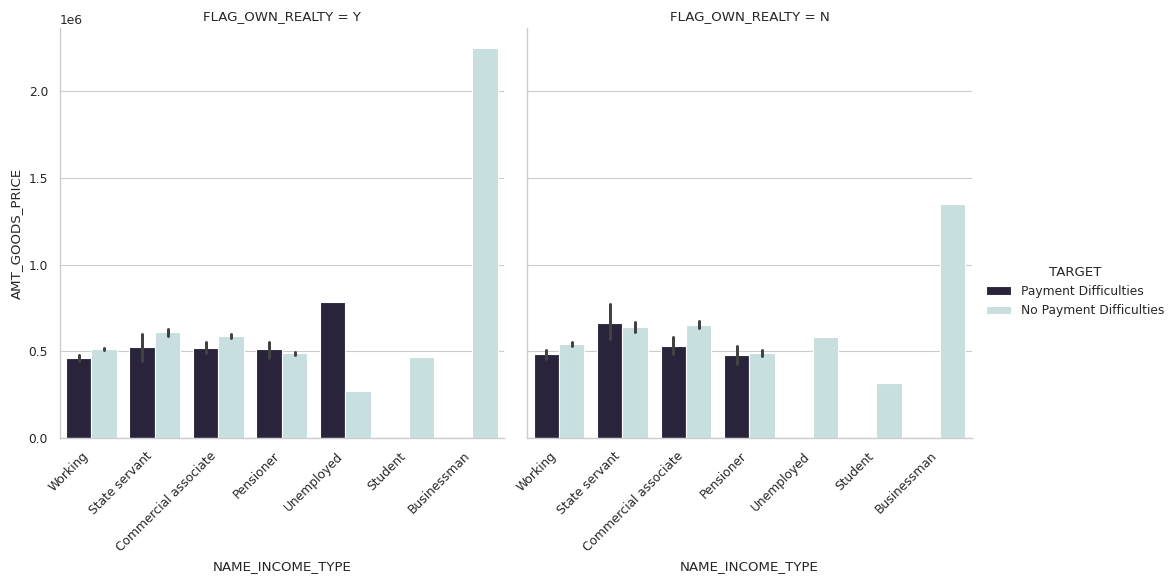

In [ ]:
# 2. Income Type, Amount of Goods Price, Target, and House/Flat Ownership Status
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_GOODS_PRICE', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_REALTY', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Klien dengan jenis penghasilan cuti hamil di FLAG_OWN_REALTY = Ya (yaitu memiliki rumah/flat) memiliki masalah dalam membayar pinjaman dibandingkan ketika FLAG_OWN_REALTY = Tidak (yaitu tidak memiliki rumah/flat).

#### Family Status, Amount of Income, Target, and House/Flat Ownership Status

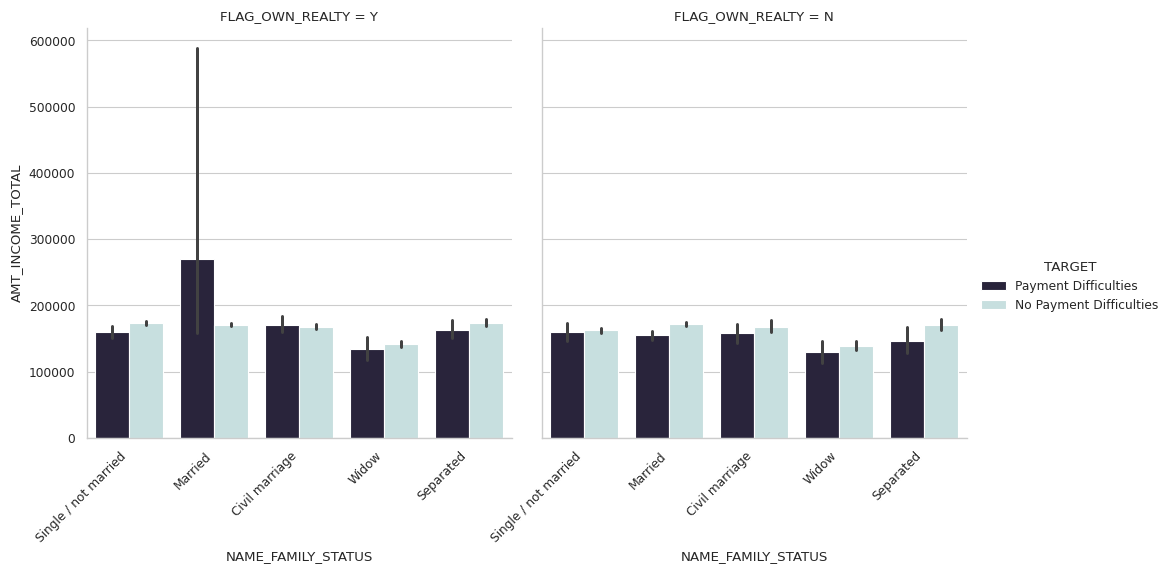

In [ ]:
# 3. Family Status, Amount of Income, Target, and House/Flat Ownership Status
fig = sns.catplot(x = 'NAME_FAMILY_STATUS',
            y = 'AMT_INCOME_TOTAL', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_REALTY', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Klien yang sudah menikah dan memiliki rumah/flat (FLAG_OWN_REALTY = Ya) memiliki masalah dalam membayar kembali pinjaman dengan pendapatan menengah dibandingkan dengan saat klien tidak memiliki rumah/flat (FLAG_OWN_REALTY = Tidak).

### Grouped by Car Ownership Status

#### Contract Type, The Number of Children, Target, and Car Ownership Status

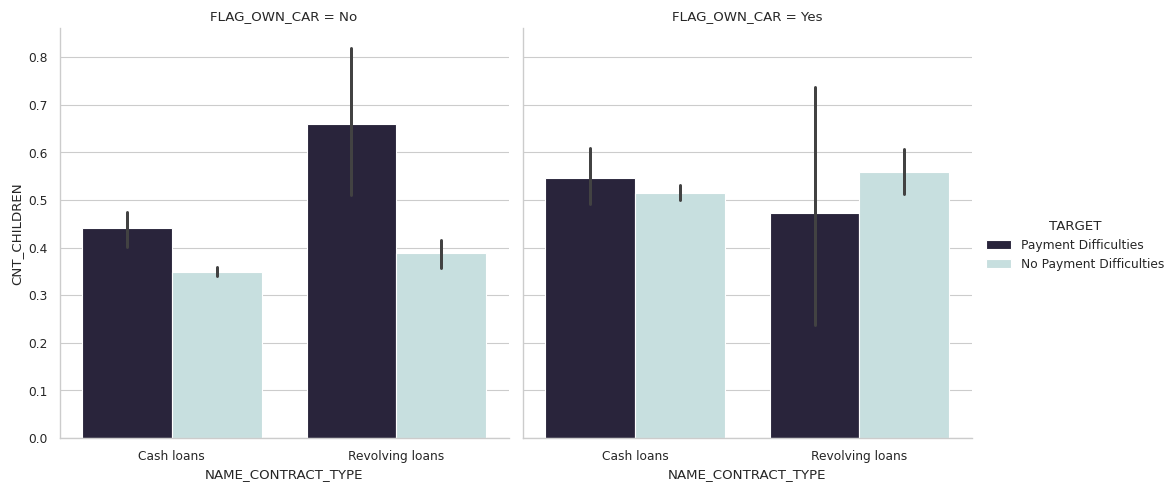

In [ ]:
# 1. Contract Type, The Number of Children, Target, and Car Ownership Status
sns.catplot(x = 'NAME_CONTRACT_TYPE',
            y = 'CNT_CHILDREN', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_CAR', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train)
plt.show()

Untuk pinjaman bergulir (revolving loans) di FLAG_OWN_CAR = Tidak (yaitu tidak memiliki mobil) memiliki masalah dalam membayar kembali pinjaman dibandingkan ketika FLAG_OWN_CAR = Ya (yaitu memiliki mobil).

### Grouped by Contract Type

#### Income Type, Amount of Credit, Target, and Contract Type

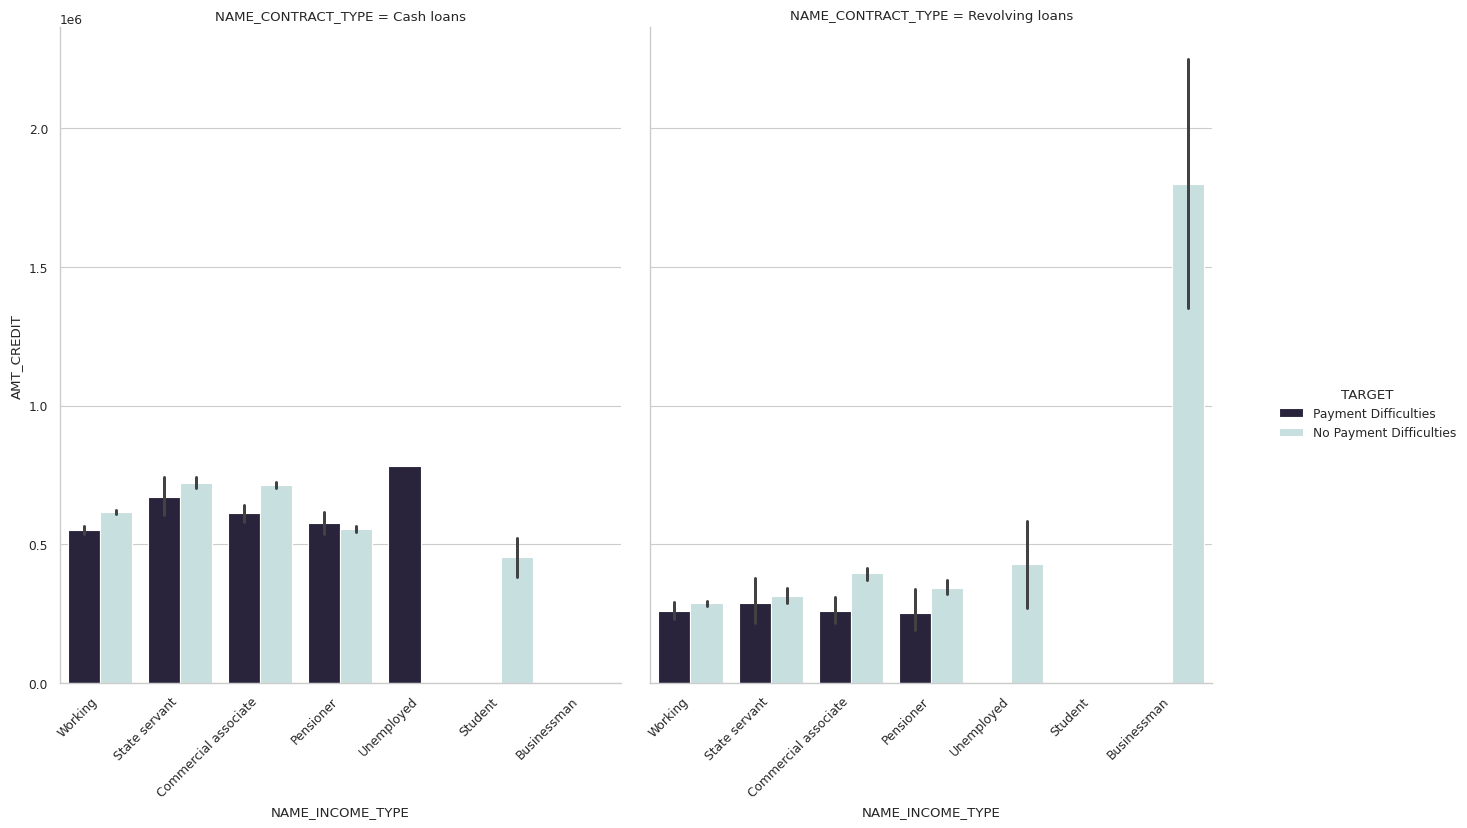

In [ ]:
# 1. Income Type, Amount of Credit, Target, and Contract Type
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'NAME_CONTRACT_TYPE', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.gcf().set_size_inches(15, 8)
plt.show()

Untuk jenis pendapatan cuti hamil dengan pinjaman tunai (cash loans), semua klien memiliki masalah dalam membayar kembali pinjaman dengan jumlah pinjaman sedang. Sementara semua klien dengan cuti hamil dan pinjaman bergulir (revolving loans) tidak mengalami kesulitan untuk mengembalikan pinjaman.

Untuk klien yang menganggur dengan pinjaman tunai, lebih dari 50% klien memiliki masalah dalam membayar kembali pinjaman dengan jumlah kredit menengah dari pinjaman tersebut. Sementara semua klien yang menganggur dengan pinjaman bergulir tidak mengalami kesulitan untuk mengembalikan pinjaman.

Semua klien siswa tidak mengalami kesulitan untuk membayar kembali pinjaman baik dengan pinjaman tunai atau pinjaman bergulir dengan jumlah pinjaman kredit rendah hingga menengah.


### Grouped by Rating of Region where Client Lives

#### Housing Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives

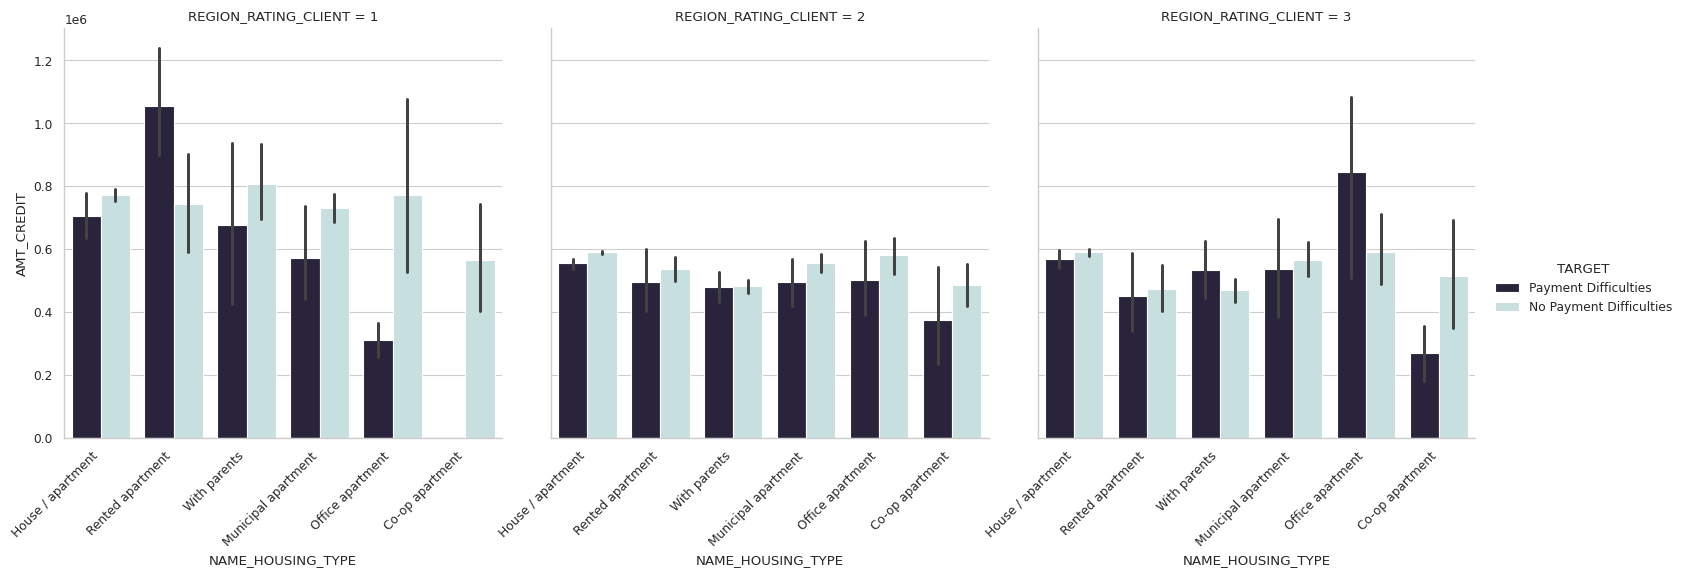

In [ ]:
# 1. Housing Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives

fig = sns.catplot(x = 'NAME_HOUSING_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Klien yang tinggal di apartemen sewaan dan apartemen kantor dan wilayahnya memiliki rating 1, memiliki masalah dalam membayar kembali pinjaman dibandingkan dengan klien di wilayah dengan rating 2 untuk jumlah pinjaman kredit sedang (medium).

#### Education Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives

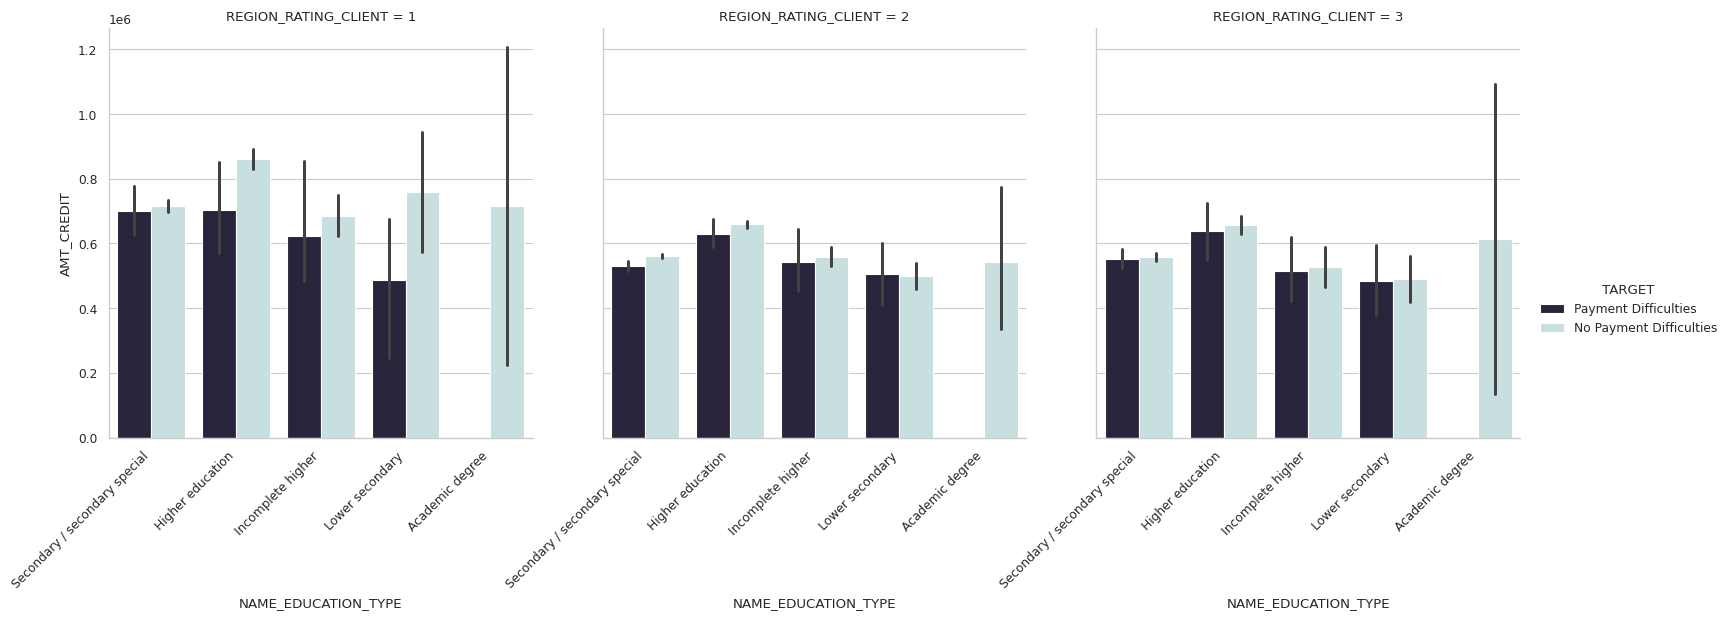

In [ ]:
# 2. Education Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives
fig = sns.catplot(x = 'NAME_EDUCATION_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Untuk klien yang memiliki gelar akademik dan tinggal di wilayah dengan rating 2, memiliki masalah dalam membayar kembali pinjaman untuk jumlah kredit pinjaman yang lebih tinggi. Dan, klien dengan gelar yang sama tetapi tinggal di wilayah dengan rating 3 memiliki masalah dalam membayar pinjaman untuk kredit pinjaman dalam jumlah sedang.

#### Family Status, Amount Credit of Loan, Target, and Rating of Region where Client Lives

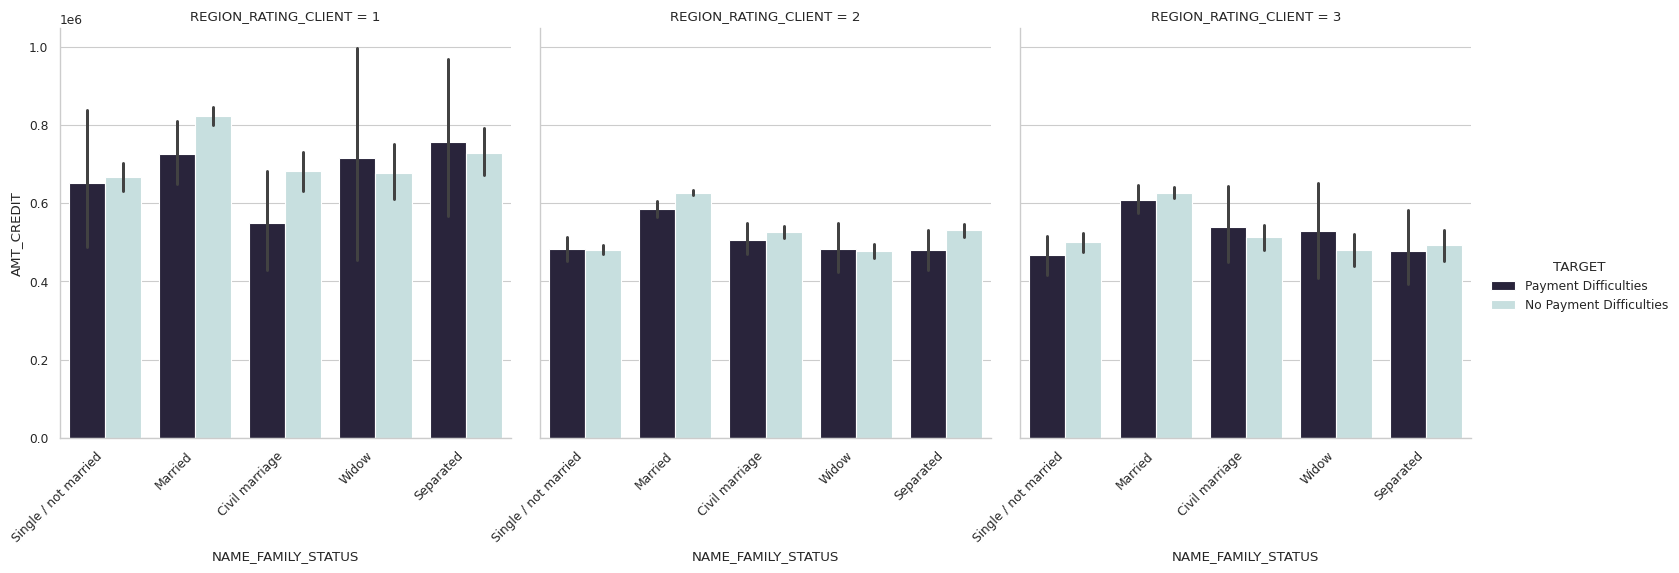

In [ ]:
# 3. Family Status, Amount Credit of Loan, Target, and Rating of Region where Client Lives

fig = sns.catplot(x = 'NAME_FAMILY_STATUS',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Klien yang berstatus keluarga janda, baik yang tinggal di daerah dengan rating 1, 2, atau 3, mengalami kesulitan dalam mengembalikan pinjaman untuk kredit pinjaman dalam jumlah sedang hingga tinggi.

Klien yang memiliki status keluarga terpisah, dan tinggal di daerah dengan peringkat 3, memiliki masalah dalam membayar pinjaman dengan jumlah kredit pinjaman yang moderat dibandingkan dengan klien yang tinggal di daerah dengan rating 1 atau 2.

# DATA PREPARATION

## Detecting Data Duplication

In [ ]:
# Detecting data duplication
print('The number of duplication is:', app_train.duplicated().sum())

The number of duplication is: 0


## Detecting Missing Value

In [ ]:
# Detecting missing value
# check for empty elements
print('Missing values status:', app_train.isnull().values.any())
nvc = pd.DataFrame(app_train.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/app_train.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,COMMONAREA_MODE,23134,70.079670
1,COMMONAREA_MEDI,23134,70.079670
2,COMMONAREA_AVG,23133,70.076641
3,NONLIVINGAPARTMENTS_MODE,22963,69.561661
4,NONLIVINGAPARTMENTS_MEDI,22963,69.561661
...,...,...,...
117,NAME_FAMILY_STATUS,0,0.000000
118,NAME_EDUCATION_TYPE,0,0.000000
119,NAME_INCOME_TYPE,0,0.000000
120,AMT_ANNUITY,0,0.000000


In [ ]:
# drop features that have large number of missing values (± 50%)
app_train.drop(app_train.iloc[:, 44:91], inplace=True, axis=1)
app_train.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

In [ ]:
# after drop some features
print('Missing values status:', app_train.isnull().values.any())
nvc = pd.DataFrame(app_train.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/app_train.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,OCCUPATION_TYPE,10411,31.537972
1,EXT_SOURCE_3,6525,19.766139
2,AMT_REQ_CREDIT_BUREAU_YEAR,4448,13.474296
3,AMT_REQ_CREDIT_BUREAU_MON,4448,13.474296
4,AMT_REQ_CREDIT_BUREAU_WEEK,4448,13.474296
...,...,...,...
68,FLAG_OWN_CAR,0,0.000000
69,CODE_GENDER,0,0.000000
70,TARGET,0,0.000000
71,DAYS_REGISTRATION,0,0.000000


<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_DAY', ylabel='Density'>

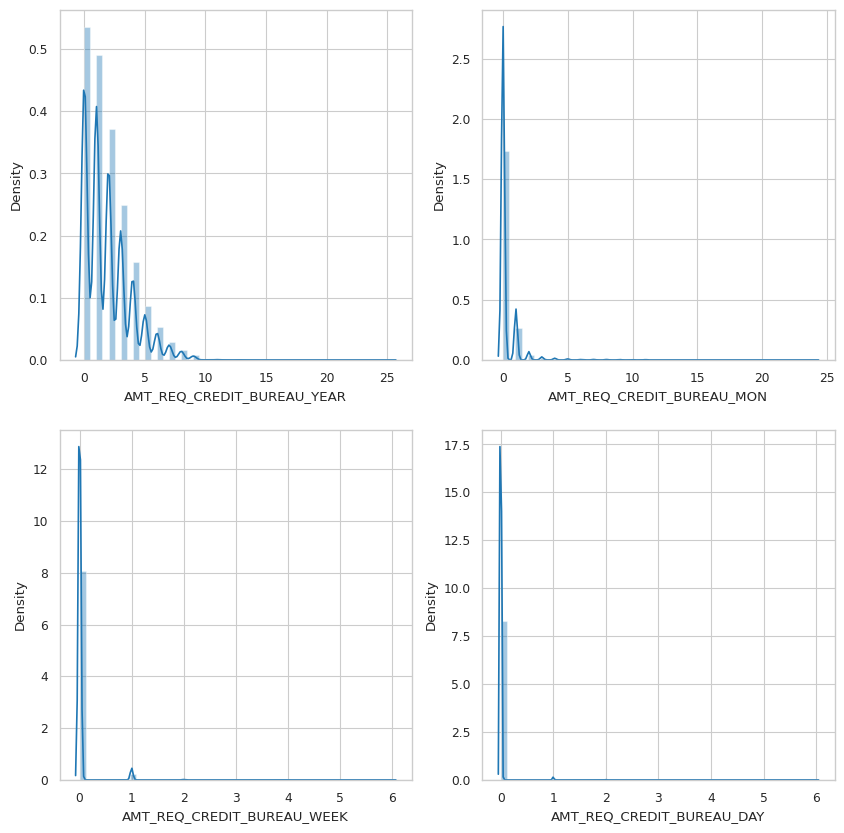

In [ ]:
# distribution of numerical features that have missing values pt.1
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(app_train['AMT_REQ_CREDIT_BUREAU_YEAR'], ax=ax[0][0])

sns.distplot(app_train['AMT_REQ_CREDIT_BUREAU_MON'], ax=ax[0][1])

sns.distplot(app_train['AMT_REQ_CREDIT_BUREAU_WEEK'], ax=ax[1][0])

sns.distplot(app_train['AMT_REQ_CREDIT_BUREAU_DAY'], ax=ax[1][1])

<Axes: xlabel='AMT_ANNUITY', ylabel='Density'>

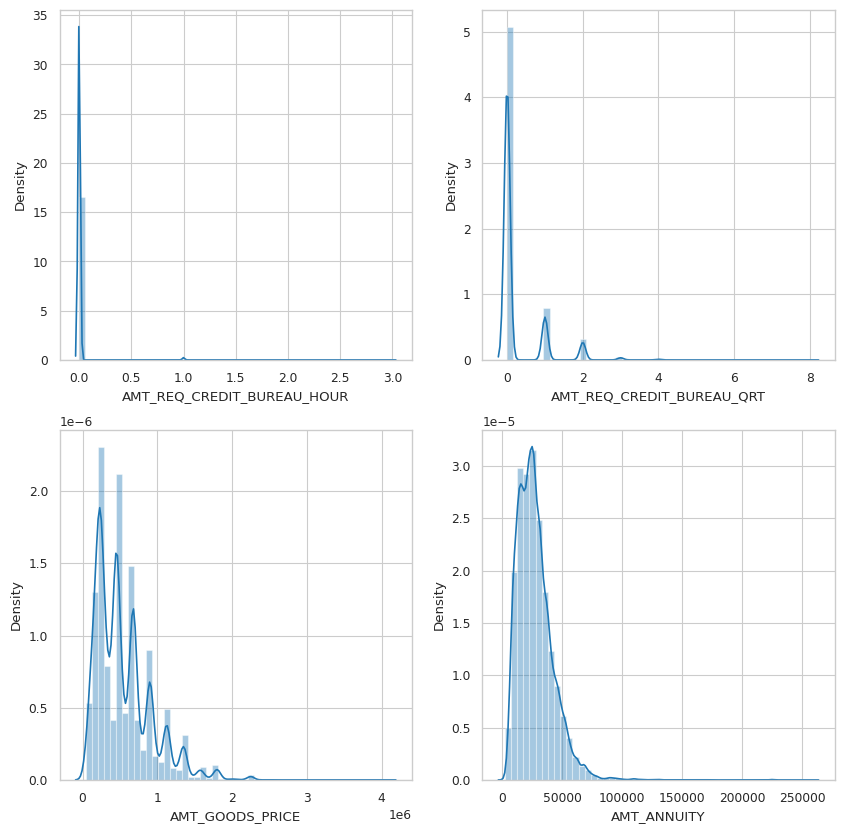

In [ ]:
# distribution of numerical features that have missing values pt.2
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(app_train['AMT_REQ_CREDIT_BUREAU_HOUR'], ax=ax[0][0])

sns.distplot(app_train['AMT_REQ_CREDIT_BUREAU_QRT'], ax=ax[0][1])

sns.distplot(app_train['AMT_GOODS_PRICE'], ax=ax[1][0])

sns.distplot(app_train['AMT_ANNUITY'], ax=ax[1][1])

<Axes: xlabel='OBS_30_CNT_SOCIAL_CIRCLE', ylabel='Density'>

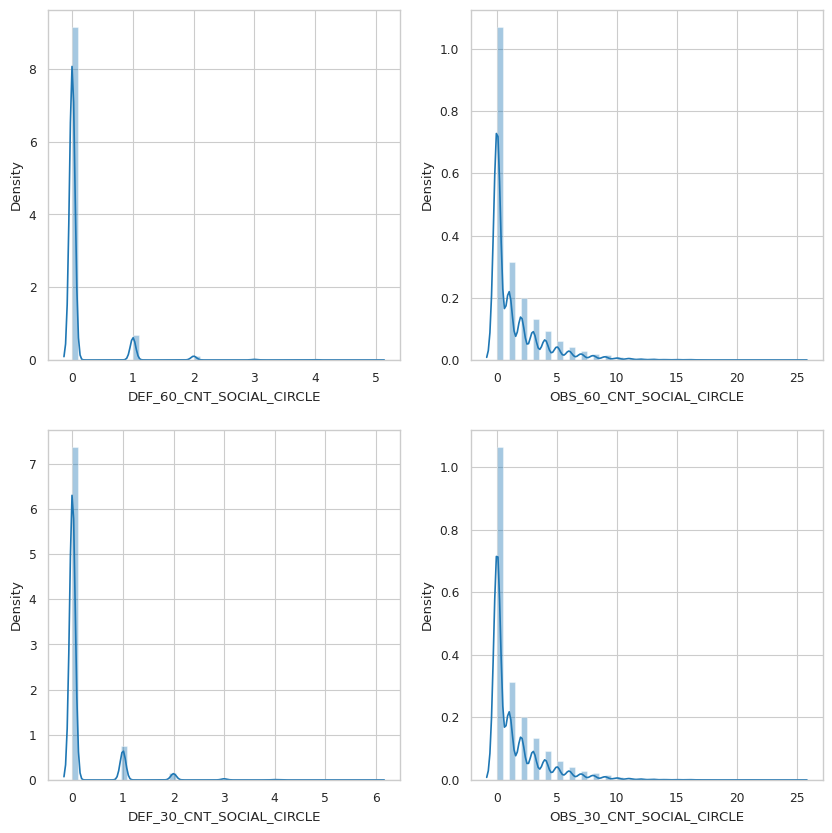

In [ ]:
# distribution of numerical features that have missing values pt.3
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(app_train['DEF_60_CNT_SOCIAL_CIRCLE'], ax=ax[0][0])

sns.distplot(app_train['OBS_60_CNT_SOCIAL_CIRCLE'], ax=ax[0][1])

sns.distplot(app_train['DEF_30_CNT_SOCIAL_CIRCLE'], ax=ax[1][0])

sns.distplot(app_train['OBS_30_CNT_SOCIAL_CIRCLE'], ax=ax[1][1])

<Axes: xlabel='DAYS_LAST_PHONE_CHANGE', ylabel='Density'>

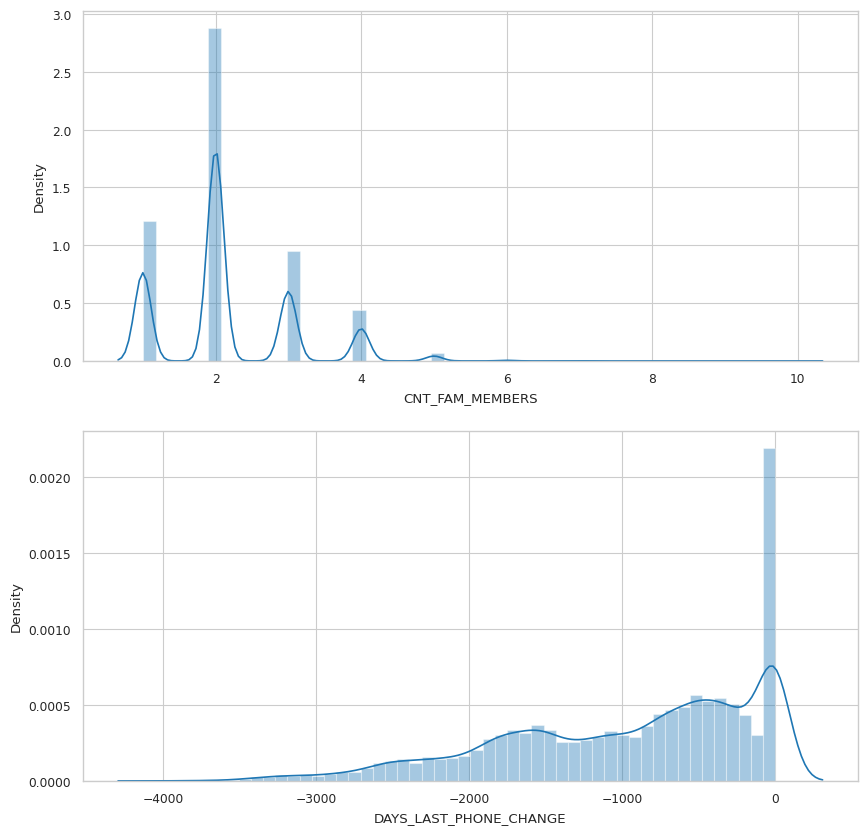

In [ ]:
# distribution of numerical features that have missing values pt.3
sns.set_style('whitegrid')
fig, ax = plt.subplots(2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(app_train['CNT_FAM_MEMBERS'], ax=ax[0])

sns.distplot(app_train['DAYS_LAST_PHONE_CHANGE'], ax=ax[1])

In [ ]:
# impute missing values with median because the data is skewed for numerical features
# impute missing values with mode for categorical features

category_columns = app_train.select_dtypes(include=['object']).columns.tolist()
integer_columns = app_train.select_dtypes(include=['int64','float64']).columns.tolist()

for column in app_train:
    if app_train[column].isnull().any():
        if(column in category_columns):
            app_train[column]=app_train[column].fillna(app_train[column].mode()[0])
        else:
            app_train[column]=app_train[column].fillna(app_train[column].median())

In [ ]:
# after imputation
print('Missing values status:', app_train.isnull().values.any())
print('\nThe number of missing values for each columns (after imputation): \n')
nvc = pd.DataFrame(app_train.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/app_train.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: False

The number of missing values for each columns (after imputation): 



,index,Total Null Values,Percentage
0,SK_ID_CURR,0,0.0
1,REG_REGION_NOT_WORK_REGION,0,0.0
2,REGION_POPULATION_RELATIVE,0,0.0
3,AMT_INCOME_TOTAL,0,0.0
4,TARGET,0,0.0
...,...,...,...
68,FLAG_DOCUMENT_20,0,0.0
69,FLAG_DOCUMENT_21,0,0.0
70,AMT_REQ_CREDIT_BUREAU_HOUR,0,0.0
71,AMT_REQ_CREDIT_BUREAU_DAY,0,0.0


## Detecting Outlier

In [ ]:
# dataset that only consist numerical features pt.1
int_features = app_train[["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]]

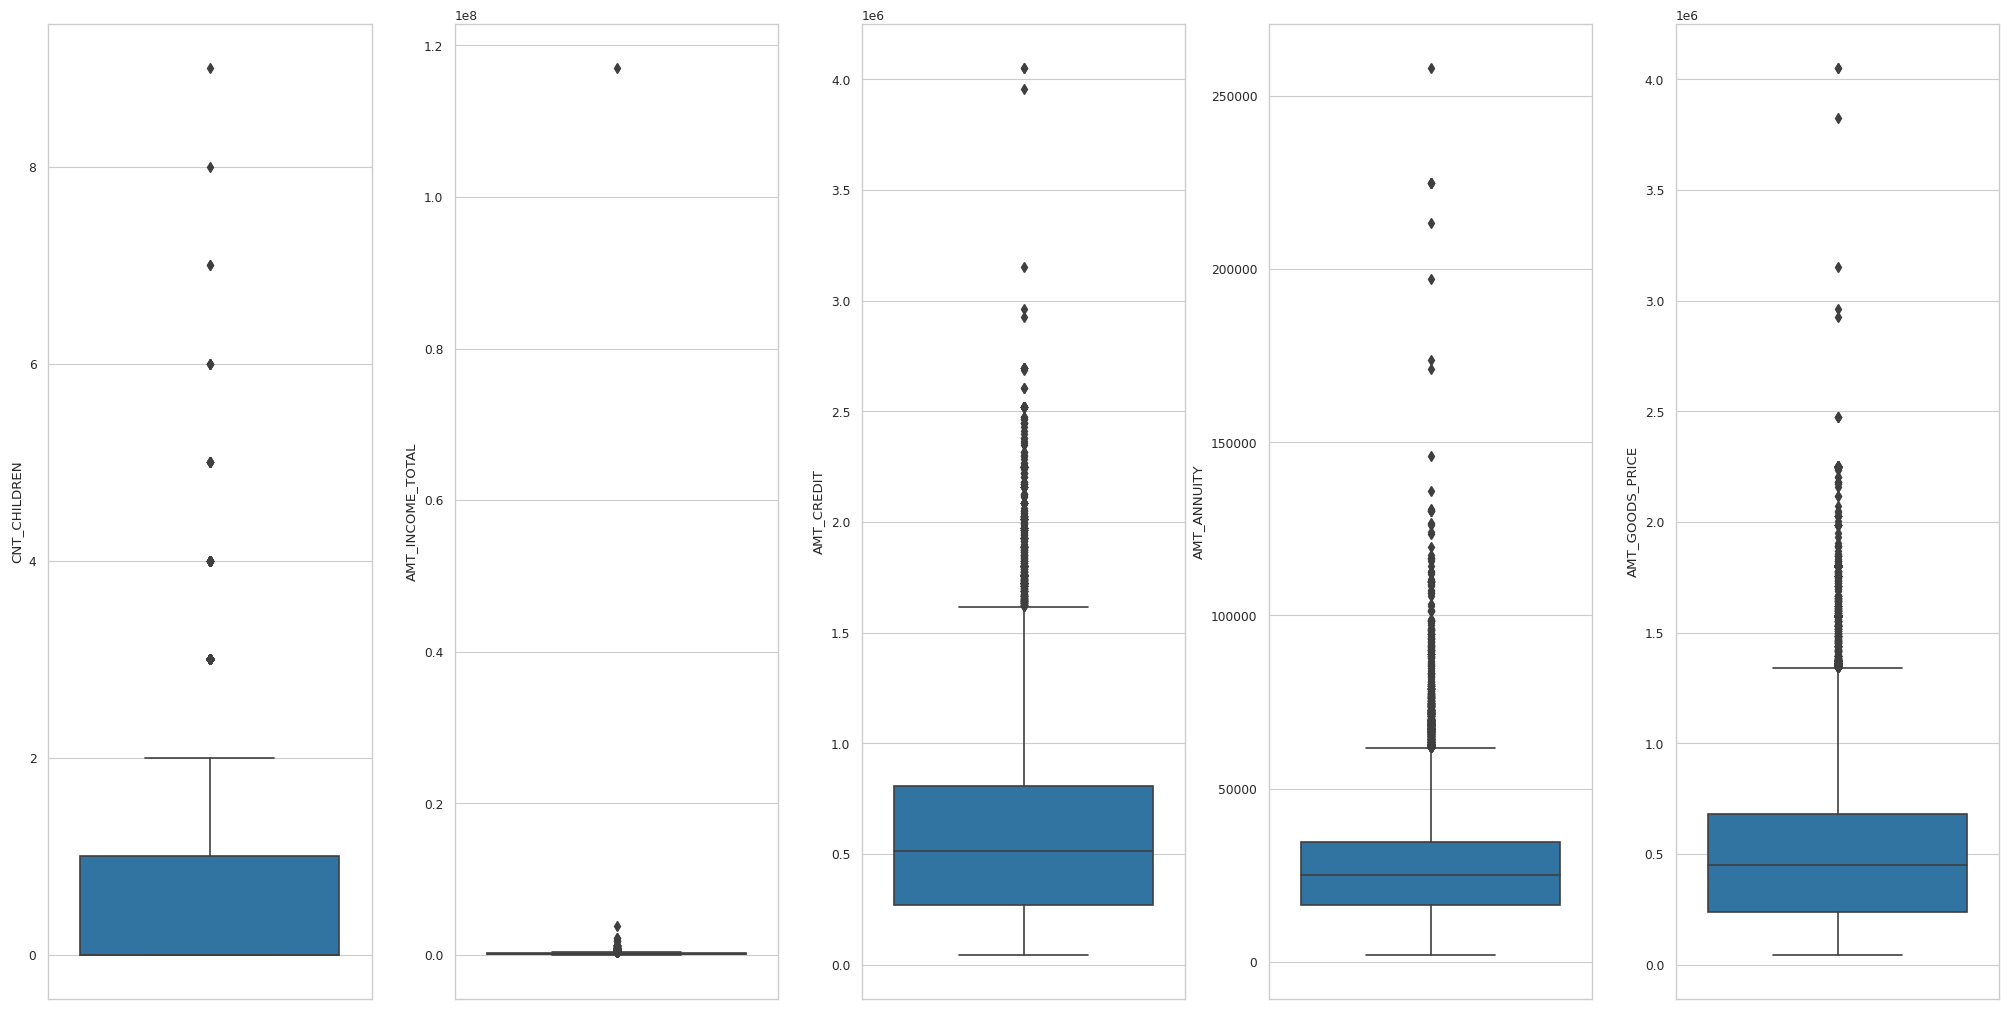

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# dataset that only consist numerical features pt.2
int_features = app_train[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "CNT_FAM_MEMBERS"]]

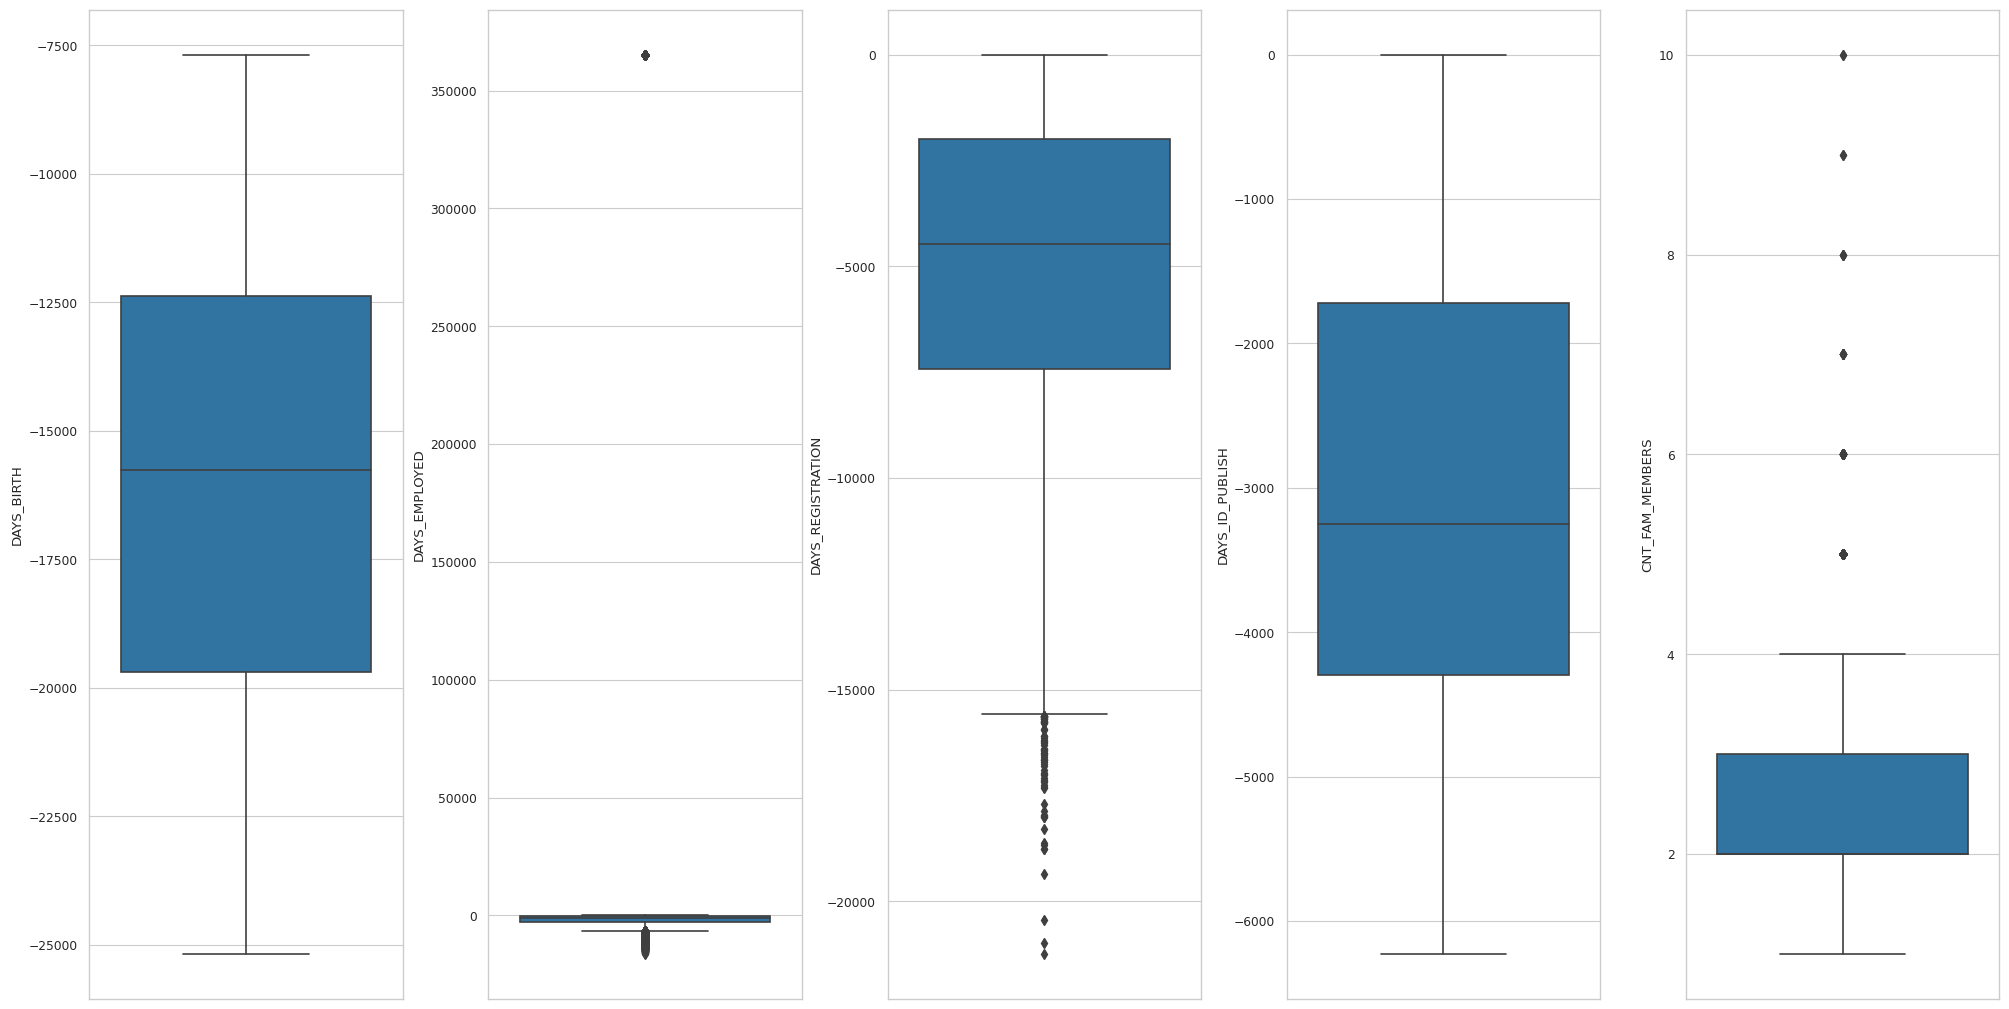

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

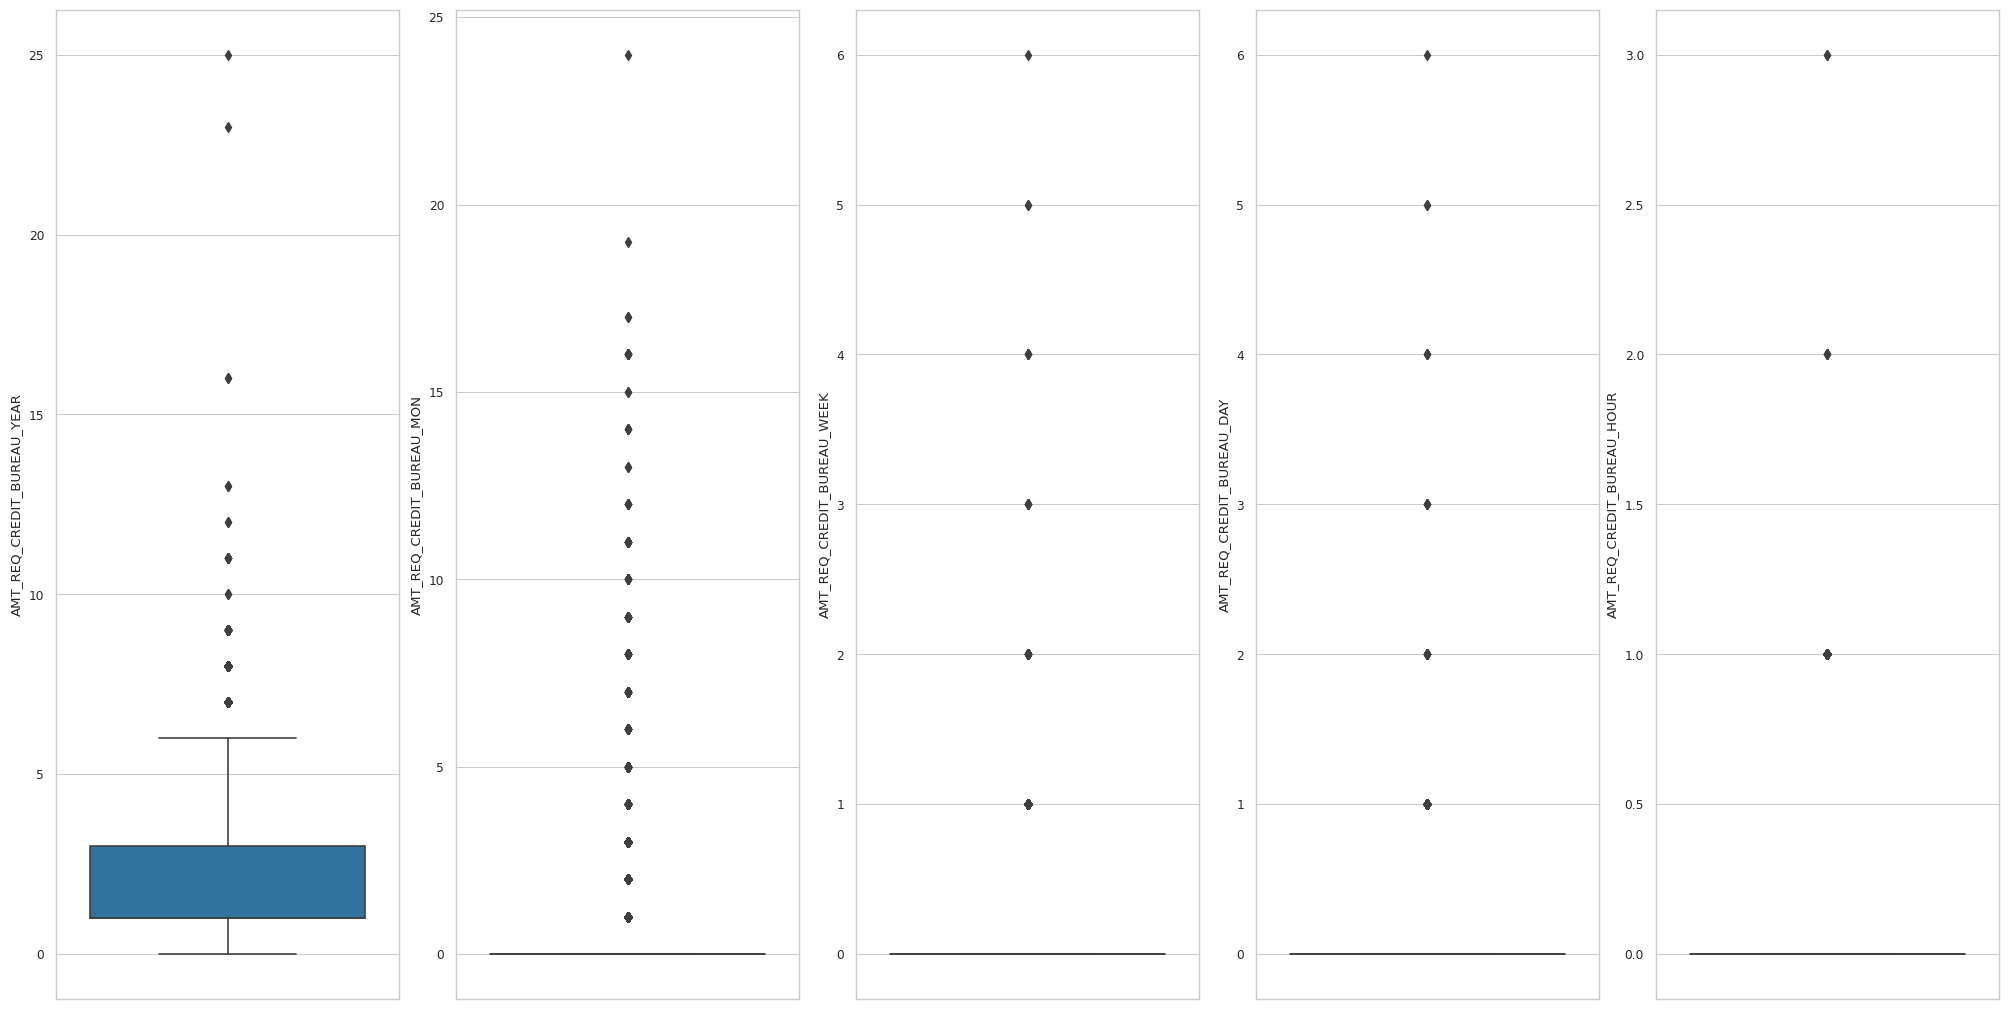

In [ ]:
# dataset that only consist numerical features pt.3
int_features = app_train[["AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR"]]
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

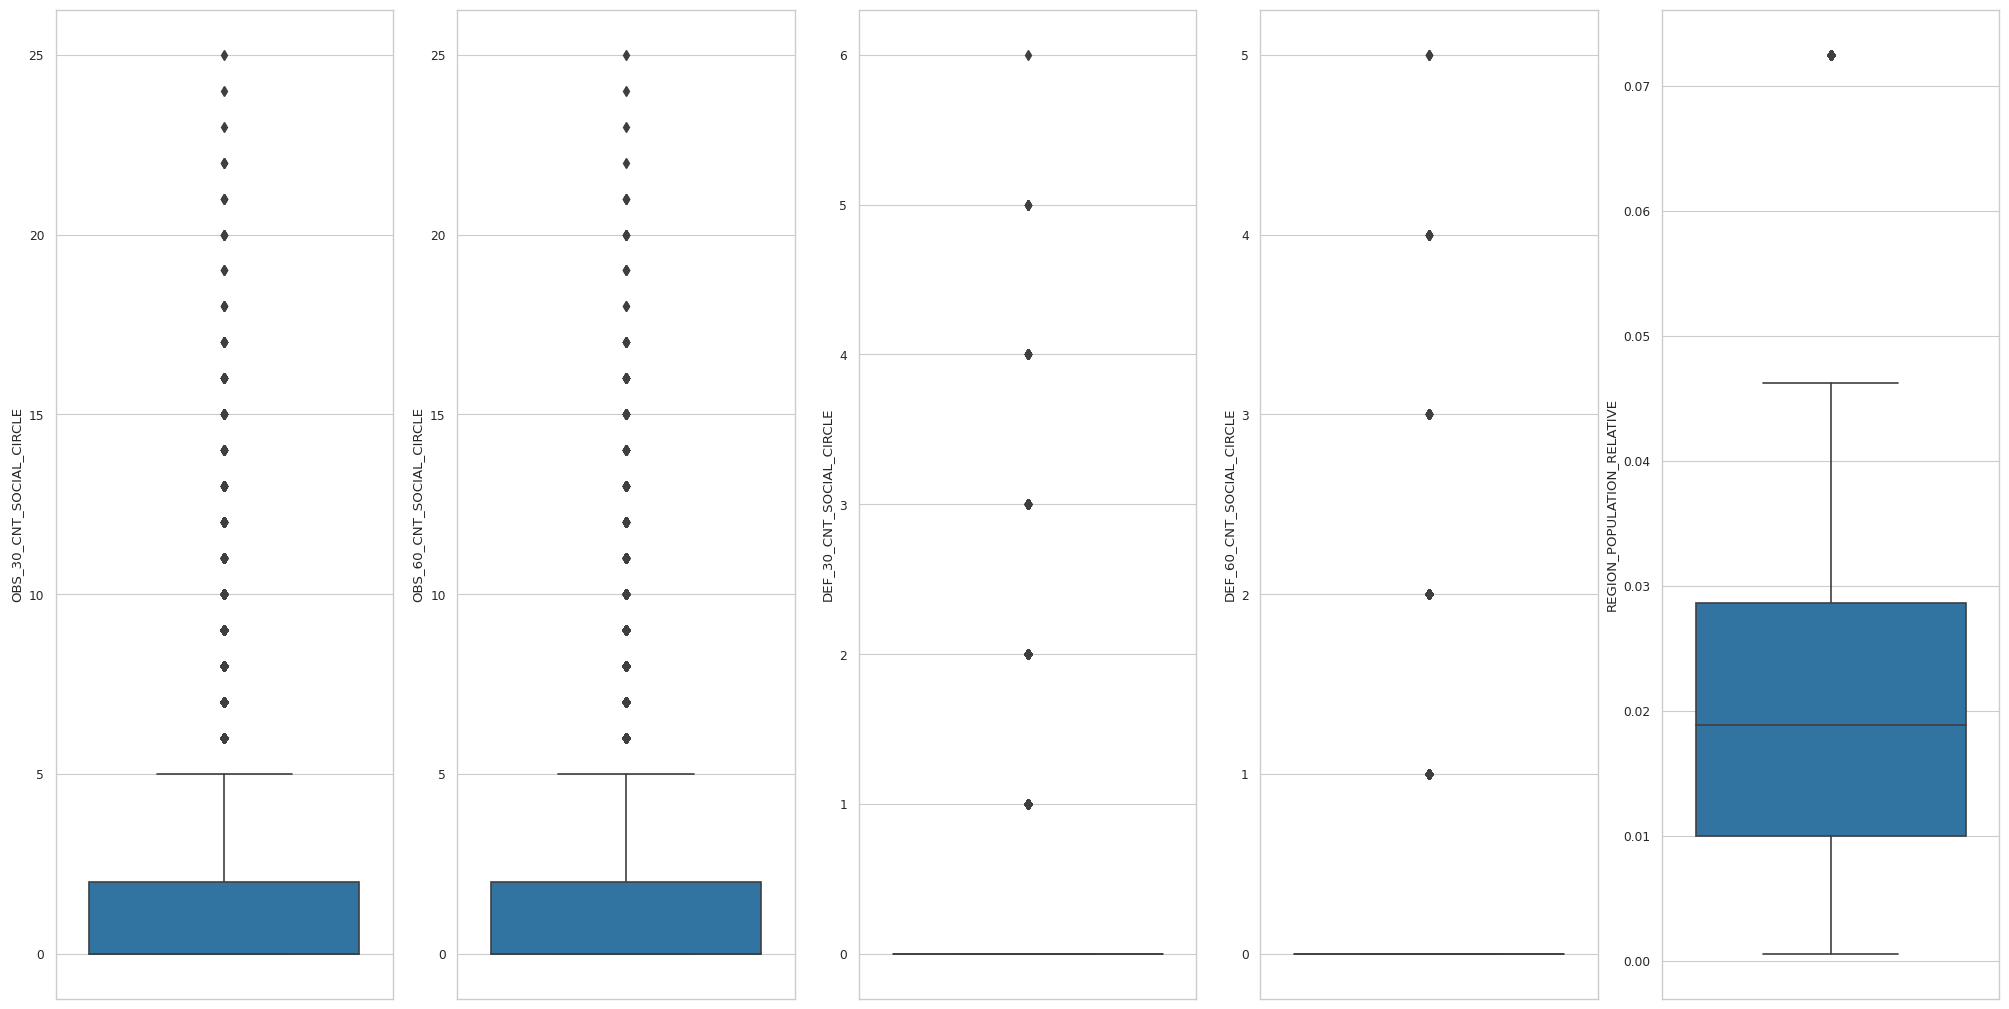

In [ ]:
# dataset that only consist numerical features pt.4
int_features = app_train[["OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "REGION_POPULATION_RELATIVE"]]
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

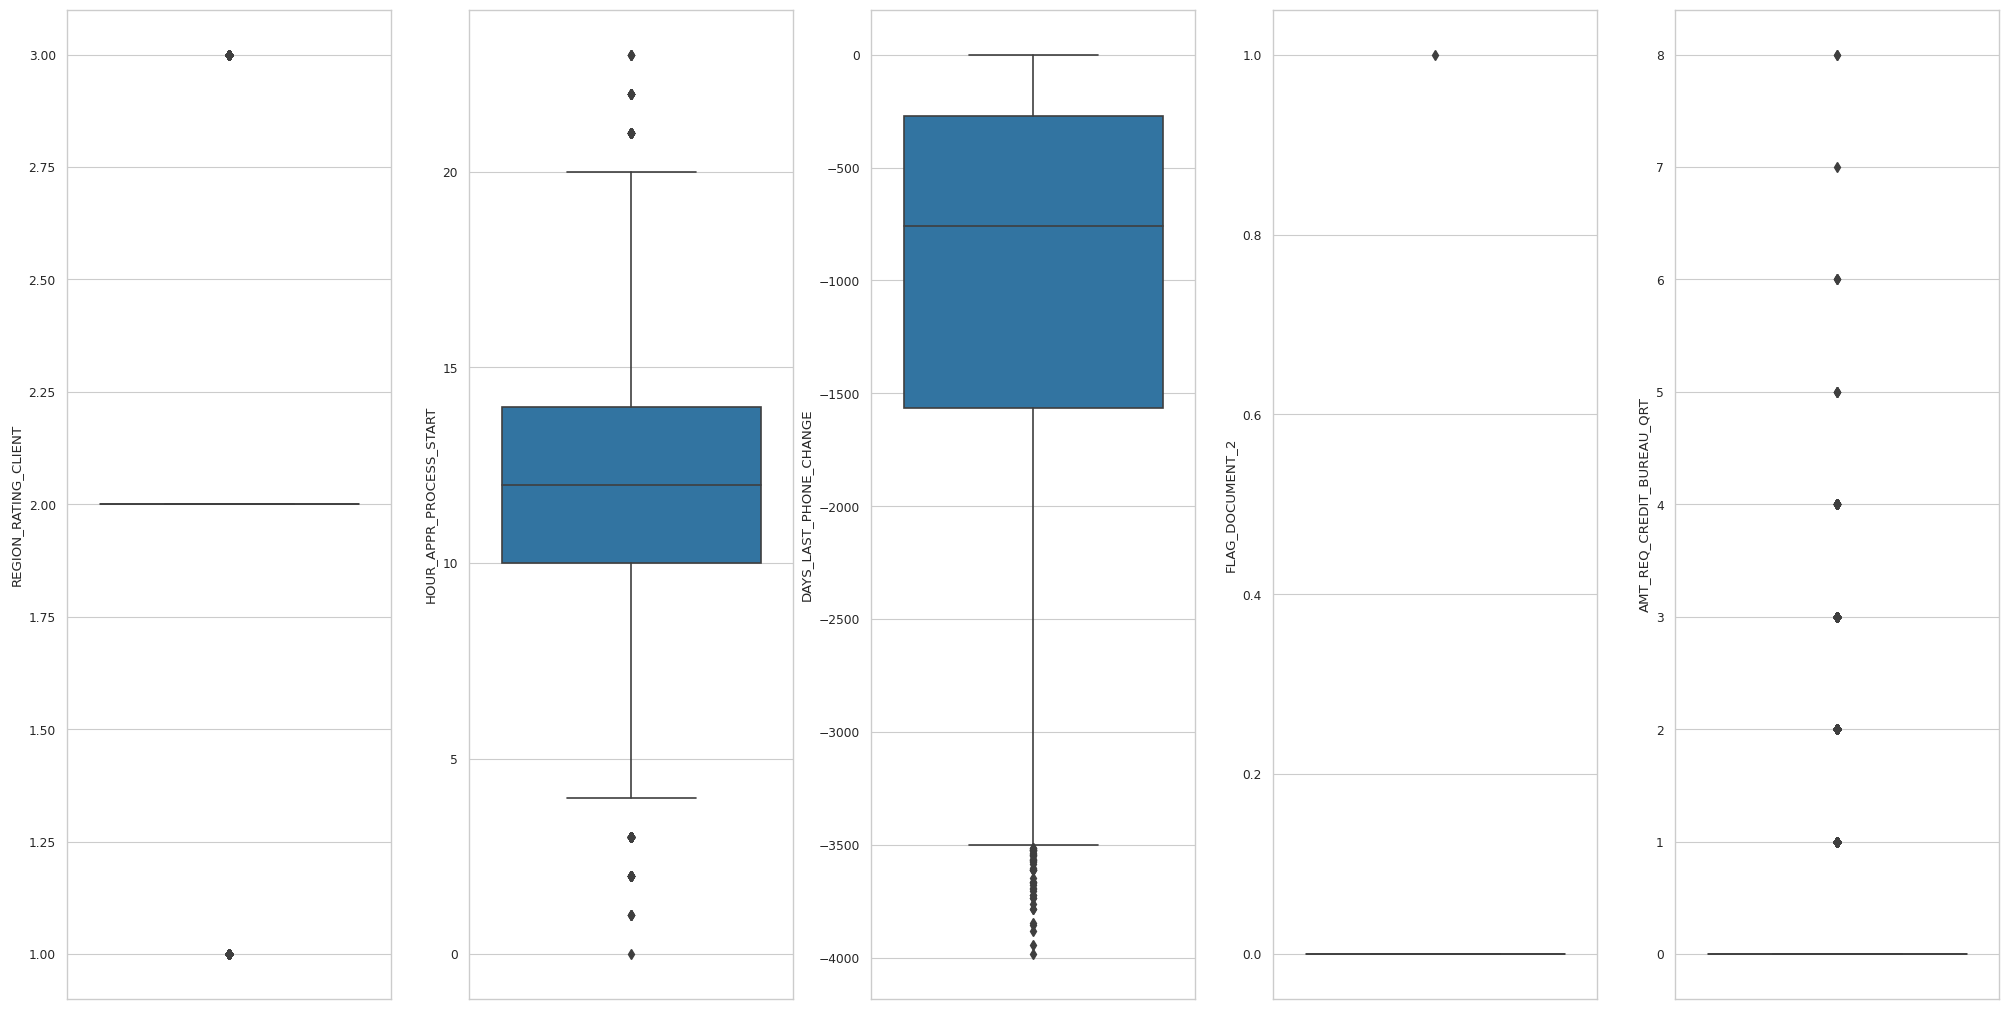

In [ ]:
# dataset that only consist numerical features pt.5
int_features = app_train[["REGION_RATING_CLIENT", "HOUR_APPR_PROCESS_START", "DAYS_LAST_PHONE_CHANGE", "FLAG_DOCUMENT_2", "AMT_REQ_CREDIT_BUREAU_QRT"]]
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Outlier pada fitur numerik yang disebutkan di atas tidak akan dihilangkan karena mungkin ada insight yang bisa diambil dari outlier tersebut.

## Machine Learning Model

### Label Encoding

In [ ]:
# label encoder for object features
app_train[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = app_train[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)
app_train.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Drop Unnecessary Feature

In [ ]:
app_train.drop(['SK_ID_CURR'], inplace=True, axis=1)
app_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Convert Negative Values to Positive Values
app_train.iloc[:,16:20] = app_train.iloc[:,16:20].abs()
app_train.iloc[:,45] = app_train.iloc[:,45].abs()
x = app_train.drop(['TARGET'], axis=1)
y = app_train['TARGET']
# feature selection
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
print('The features that correlate well with target feature:\n')
featureScores.sort_values(by=['Score'], ascending=False)

The features that correlate well with target feature:



,Features,Score
5,AMT_INCOME_TOTAL,1.712067e+07
16,DAYS_EMPLOYED,1.523749e+07
8,AMT_GOODS_PRICE,1.290129e+07
6,AMT_CREDIT,8.676692e+06
15,DAYS_BIRTH,2.447590e+05
...,...,...
22,FLAG_CONT_MOBILE,6.445857e-03
48,FLAG_DOCUMENT_5,5.286948e-03
62,FLAG_DOCUMENT_19,1.380306e-04
19,FLAG_MOBIL,2.657163e-06


Dapat terlihat features yang berkolerasi payment difficulties.

Best features: DAYS_EMPLOYED, AMT_GOODS_PRICE, and AMT_CREDIT

Worst features: FLAG_MOBIL, FLAG_CONT_MOBILE, and AMT_REQ_CREDIT_BUREAU_HOUR

### Handling Data Imbalance

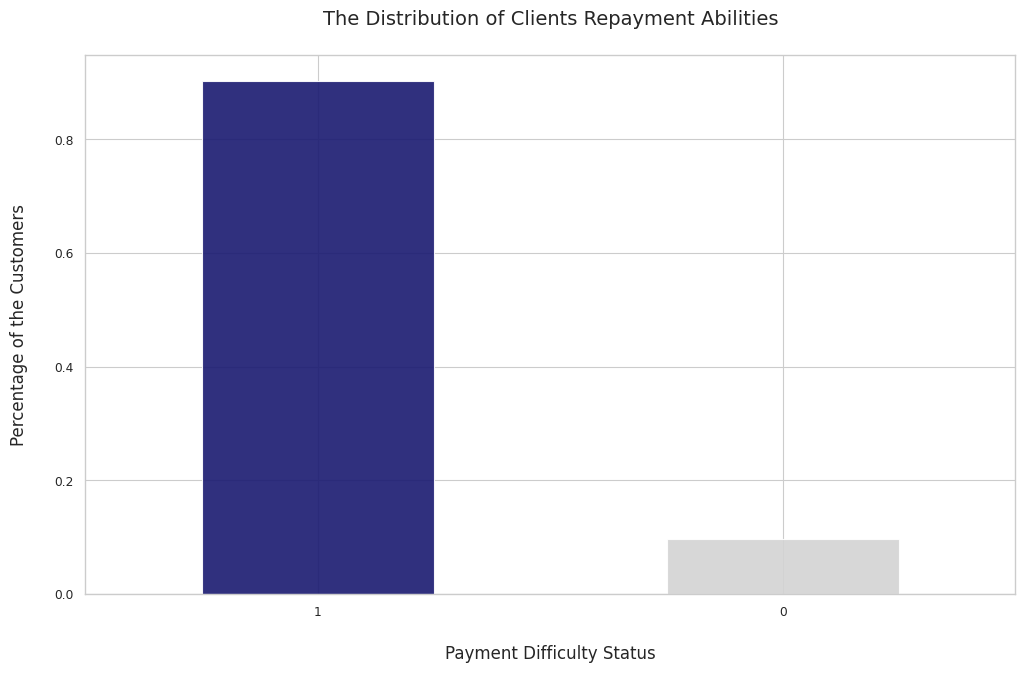

In [ ]:
# create two different dataframe of majority and minority class 
df_majority = app_train[(app_train['TARGET']==0)] 
df_minority = app_train[(app_train['TARGET']==1)] 

# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 282686, # to match majority class
                                 random_state=42)  # reproducible results

# combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])
fig = plt.figure(figsize = (12,7))
df_upsampled['TARGET'].value_counts(normalize=True).plot(kind='bar', color= ['midnightblue','lightgrey'], alpha = 0.9, rot=0)
plt.title('The Distribution of Clients Repayment Abilities\n', fontsize=14)
plt.ylabel('Percentage of the Customers\n', fontsize=12)
plt.xlabel('\nPayment Difficulty Status', fontsize=12)
plt.show()

Terlihat bahwa data sudah berimbang, sehingga analisis dapat dilanjutkan.

# MODELLING

## Data Splitting

In [ ]:
# define x and y features (top 20 features)
x_balanced = df_upsampled[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 
                           'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                          'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                          'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
y_balanced = df_upsampled['TARGET']
# splitting tha data
X_train, X_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
# normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

(250428, 20) (62607, 20)


## Logistik Regression

In [ ]:
# train the model
log_model = LogisticRegression().fit(X_train, y_train)
print(log_model)

# predict data train
y_train_pred_log = log_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

LogisticRegression()
Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      0.01      0.01     24247
           1       0.90      1.00      0.95    226181

    accuracy                           0.90    250428
   macro avg       0.95      0.50      0.48    250428
weighted avg       0.91      0.90      0.86    250428



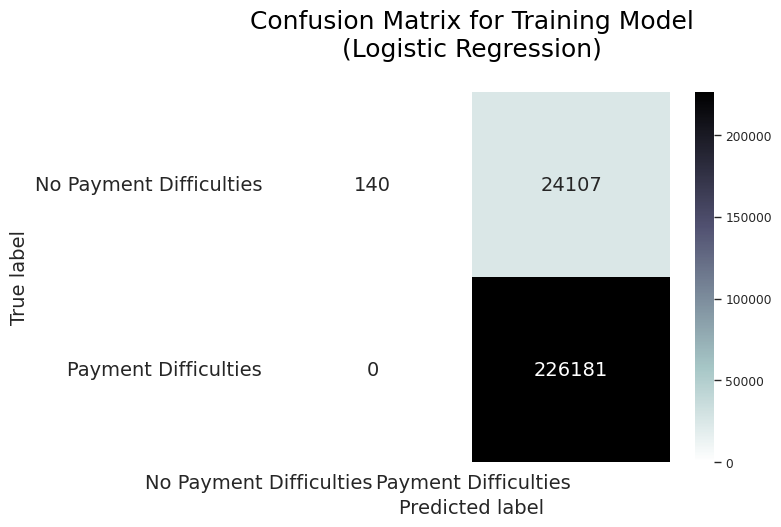

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, y_train_pred_log)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
# predict data test
y_test_pred_log = log_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      0.01      0.01      6102
           1       0.90      1.00      0.95     56505

    accuracy                           0.90     62607
   macro avg       0.95      0.50      0.48     62607
weighted avg       0.91      0.90      0.86     62607



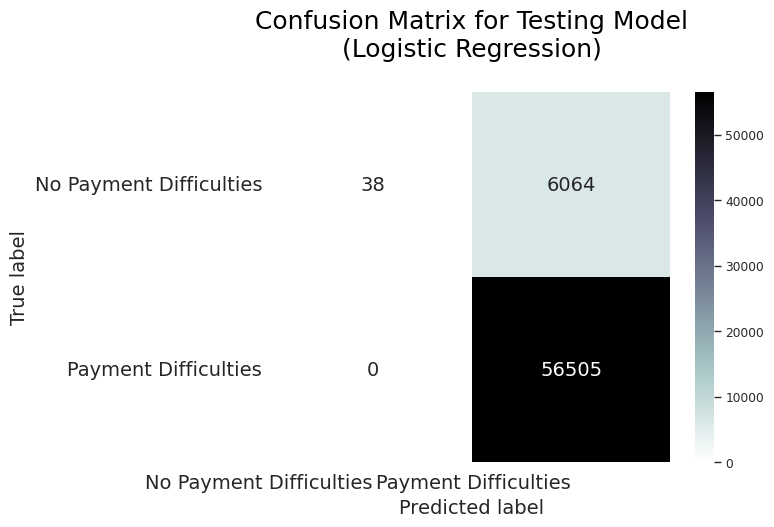

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_log)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
acc_log_train=round(log_model.score(X_train,y_train)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 90.37
Test Accuracy: % 90.31


Model Logistik Regression menghasilkan akurasi sebesar 90.37%. Terdapat error margin sebesar 0.06%

In [ ]:
# ROC scores
roc_auc_log = round(roc_auc_score(y_test, y_test_pred_log),4)
print('ROC AUC:', roc_auc_log)

ROC AUC: 0.5031


## Gaussian Naive Bayes 

In [ ]:
# train the model
gnb_model = GaussianNB().fit(X_train, y_train)
print(gnb_model)

# predict data train
y_train_pred_gnb = gnb_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Gaussian Naive Bayes):')
print(classification_report(y_train, y_train_pred_gnb))

GaussianNB()
Classification Report Training Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.14      0.75      0.24     24247
           1       0.95      0.52      0.68    226181

    accuracy                           0.55    250428
   macro avg       0.55      0.64      0.46    250428
weighted avg       0.87      0.55      0.63    250428



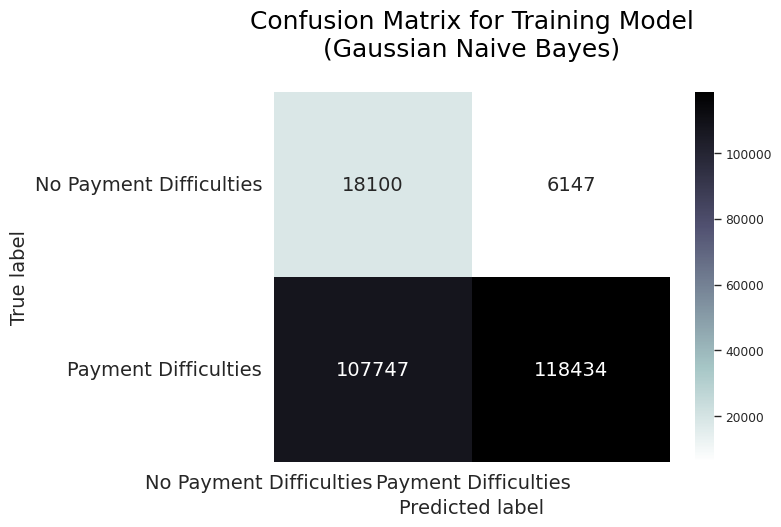

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_train, y_train_pred_gnb)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gaussian Naive Bayes)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
# predict data test
y_test_pred_gnb = gnb_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Gaussian Naive Bayes):')
print(classification_report(y_test, y_test_pred_gnb))

Classification Report Testing Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.14      0.75      0.24      6102
           1       0.95      0.52      0.67     56505

    accuracy                           0.54     62607
   macro avg       0.55      0.63      0.45     62607
weighted avg       0.87      0.54      0.63     62607



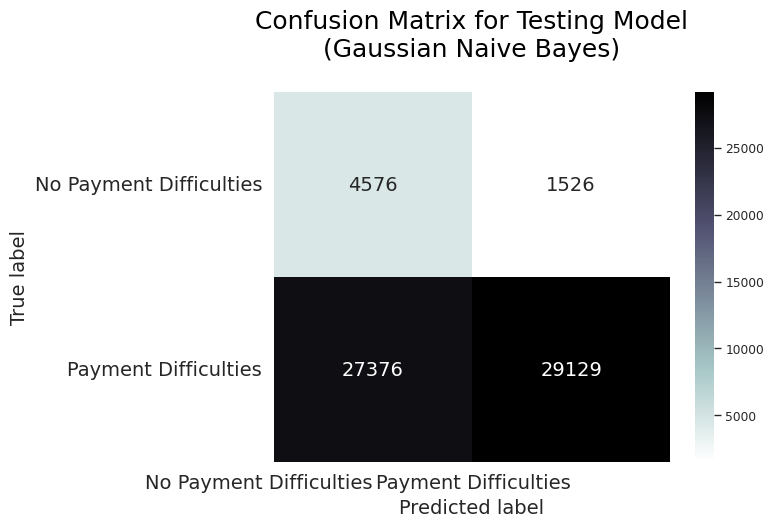

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_test, y_test_pred_gnb)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gaussian Naive Bayes)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
acc_nb_train=round(gnb_model.score(X_train,y_train)*100,2)
acc_nb_test=round(gnb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_nb_train))
print("Test Accuracy: % {}".format(acc_nb_test))

Training Accuracy: % 54.52
Test Accuracy: % 53.84


Model Gaussian Bayes menghasilkan akurasi sebesar 54,52%. Terdapat error margin sebesar 0,68%.



In [ ]:
# ROC scores
roc_auc_gnb = round(roc_auc_score(y_test, y_test_pred_gnb),4)
print('ROC AUC:', roc_auc_gnb)

ROC AUC: 0.6327


## Decision Tree

In [ ]:
# train the model
dt_model = DecisionTreeClassifier().fit(X_train,y_train)
print(dt_model)

DecisionTreeClassifier()


In [ ]:
# predict data train
y_train_pred_dt = dt_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24247
           1       1.00      1.00      1.00    226181

    accuracy                           1.00    250428
   macro avg       1.00      1.00      1.00    250428
weighted avg       1.00      1.00      1.00    250428



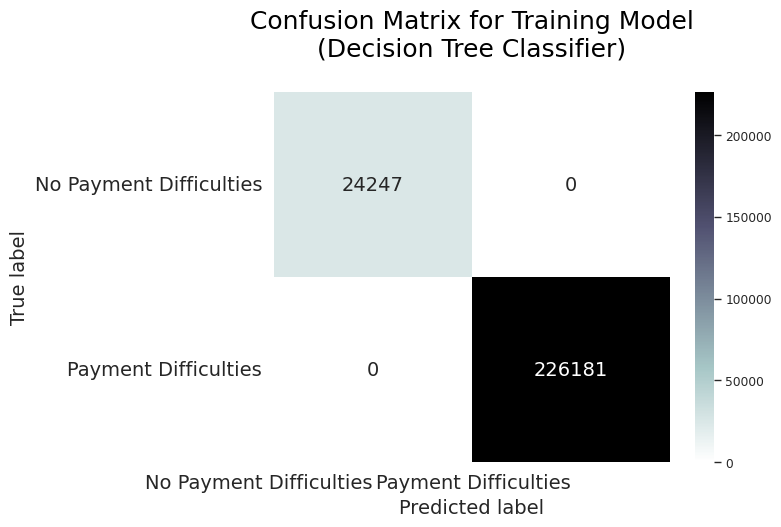

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Decision Tree Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
# predict data test
y_test_pred_dt = dt_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Decision Tree Classifier):')
print(classification_report(y_test, y_test_pred_dt))

Classification Report Testing Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.30      0.92      0.46      6102
           1       0.99      0.77      0.87     56505

    accuracy                           0.79     62607
   macro avg       0.65      0.85      0.66     62607
weighted avg       0.92      0.79      0.83     62607



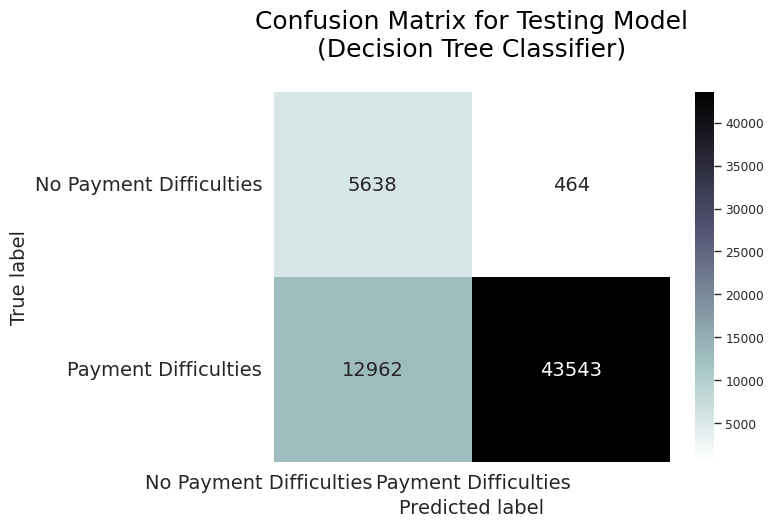

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_dt_train))
print("Test Accuracy: % {}".format(acc_dt_test))

Training Accuracy: % 100.0
Test Accuracy: % 78.56


Model Decision Tree menghasilkan akurasi sebesar 100%. Terdapat error margin sebesar 21.44%.



In [ ]:
# ROC scores
roc_auc_dt = round(roc_auc_score(y_test, y_test_pred_dt),4)
print('ROC AUC:', roc_auc_dt)

ROC AUC: 0.8473


## Random Forest

In [ ]:
# train the model
rf_model = RandomForestClassifier().fit(X_train, y_train)
print(rf_model)

# predict data train
y_train_pred_dt = rf_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

RandomForestClassifier()
Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24247
           1       1.00      1.00      1.00    226181

    accuracy                           1.00    250428
   macro avg       1.00      1.00      1.00    250428
weighted avg       1.00      1.00      1.00    250428



Text(0.5, 22.71666666666666, 'Predicted label')

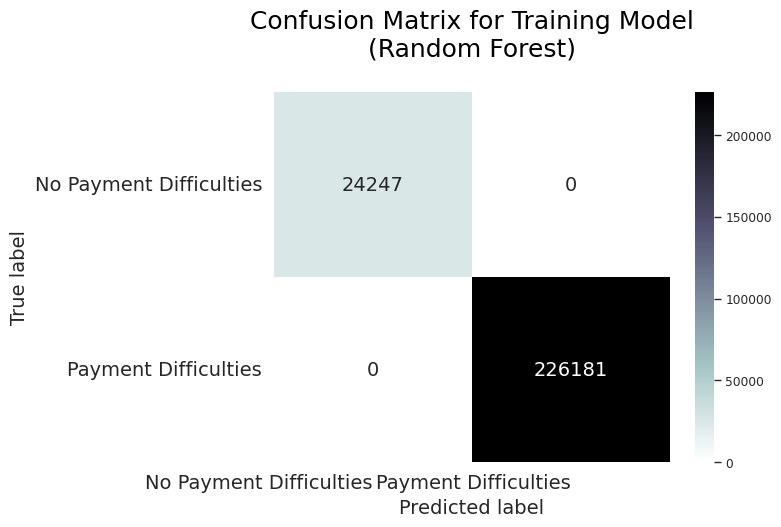

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)

In [ ]:
# predict data test
y_test_pred_rf = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

# print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred_rf))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6102
           1       1.00      0.99      1.00     56505

    accuracy                           0.99     62607
   macro avg       0.97      0.99      0.98     62607
weighted avg       0.99      0.99      0.99     62607



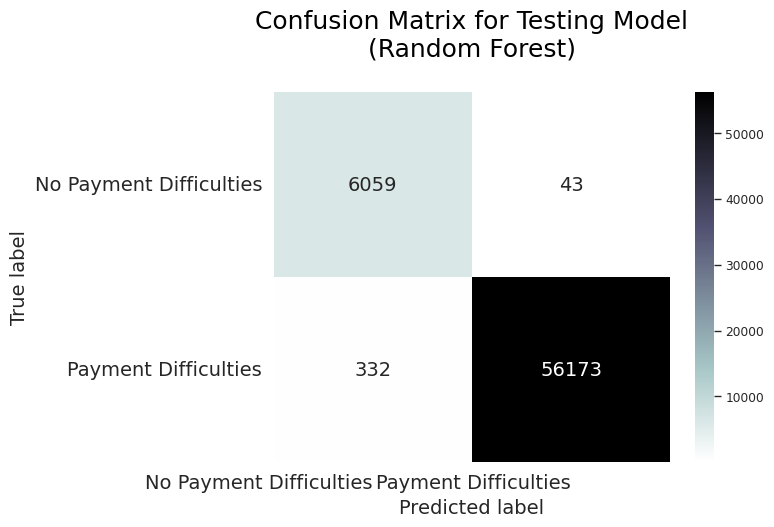

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
acc_rf_train=round(rf_model.score(X_train,y_train)*100,2)
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rf_train))
print("Test Accuracy: % {}".format(acc_rf_test))

Training Accuracy: % 100.0
Test Accuracy: % 99.4


Model Random Forest menghasilkan akurasi sebesar 100%.Terdapat error margin sebesar 0.6%



In [ ]:
# ROC scores
roc_auc_rf = round(roc_auc_score(y_test, y_test_pred_rf),4)
print('ROC AUC:', roc_auc_rf)

ROC AUC: 0.9935


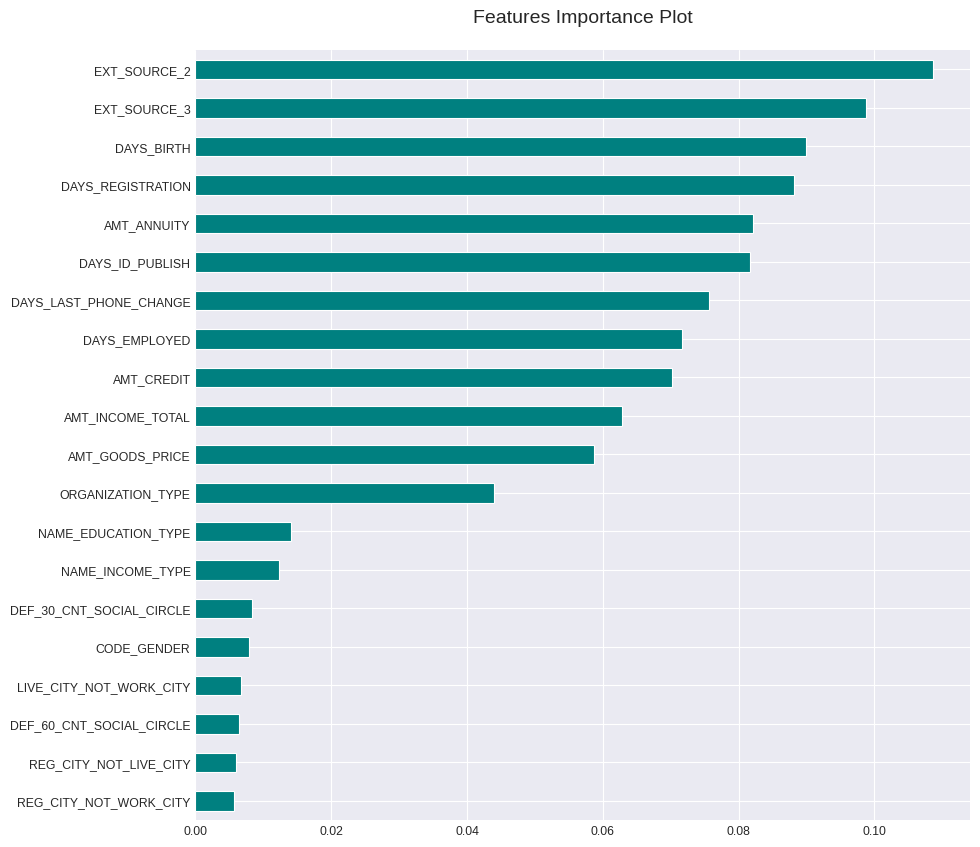

In [ ]:
# important features
importances_rf = pd.Series(rf_model.feature_importances_, index=x_balanced.columns).sort_values(ascending=True)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
fig = importances_rf.plot(kind ='barh', color ='teal')
plt.title('Features Importance Plot\n', fontsize=14)
plt.show()

fig.figure.tight_layout()
fig.figure.savefig('top feature.png')

## K-Nearest Neighbour

In [ ]:
# train the model
knn_model = KNeighborsClassifier().fit(X_train,y_train)
print(knn_model)
# predit data train
y_train_pred_knn = knn_model.predict(X_train)

# print classification report
print('Classification Report Training Model (K-Nearest Neighbors):')
print(classification_report(y_train, y_train_pred_knn))

KNeighborsClassifier()
Classification Report Training Model (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       1.00      0.84      0.91     24247
           1       0.98      1.00      0.99    226181

    accuracy                           0.98    250428
   macro avg       0.99      0.92      0.95    250428
weighted avg       0.98      0.98      0.98    250428



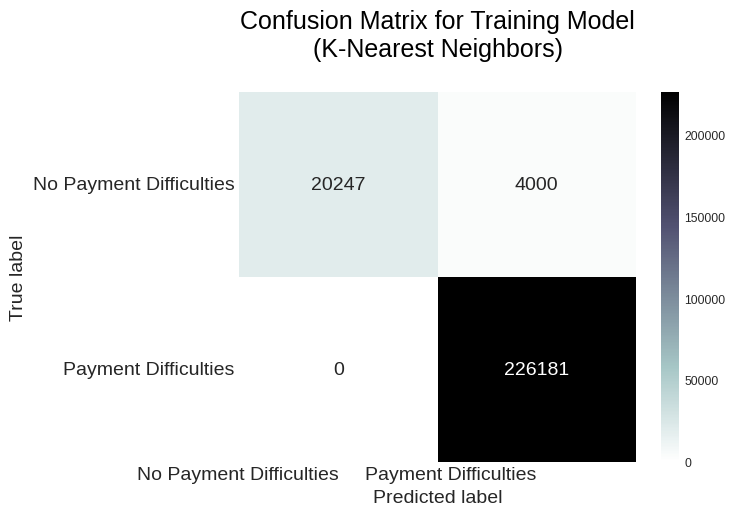

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_train, y_train_pred_knn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(K-Nearest Neighbors)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
# predit data test
y_test_pred_knn = knn_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (K-Nearest Neighbors):')
print(classification_report(y_test, y_test_pred_knn))

Classification Report Testing Model (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      6102
           1       0.98      1.00      0.99     56505

    accuracy                           0.98     62607
   macro avg       0.99      0.88      0.93     62607
weighted avg       0.98      0.98      0.98     62607



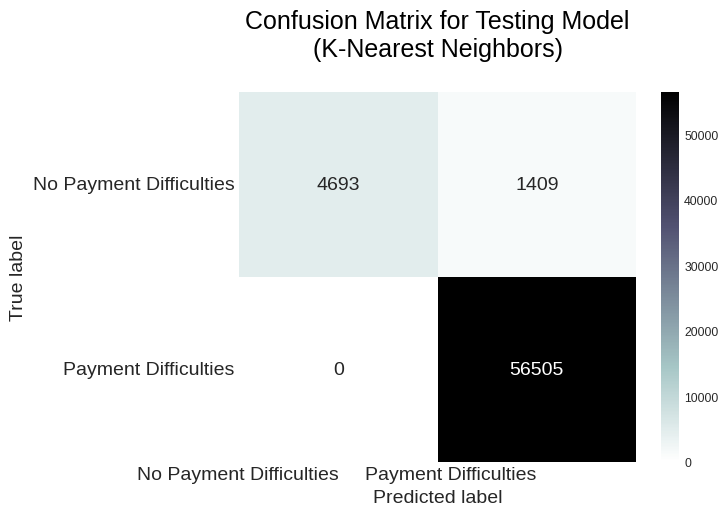

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_test, y_test_pred_knn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(K-Nearest Neighbors)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
acc_knn_train=round(knn_model.score(X_train,y_train)*100,2)
acc_knn_test=round(knn_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_knn_train))
print("Test Accuracy: % {}".format(acc_knn_test))

Training Accuracy: % 98.4
Test Accuracy: % 97.75


Model K-Nearest Neighbour menghasilkan akurasi sebesar 98,4%. Terdapat error margin sebesar 0,65%



In [ ]:
# ROC scores
roc_auc_knn = round(roc_auc_score(y_test, y_test_pred_knn),4)
print('ROC AUC:', roc_auc_knn)

ROC AUC: 0.8845


## Neural Network

In [ ]:
# train the model
nn_model = MLPClassifier().fit(X_train, y_train)
# predit data train
y_train_pred_nn = nn_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Neural Network):')
print(classification_report(y_train, y_train_pred_nn))

Classification Report Training Model (Neural Network):
              precision    recall  f1-score   support

           0       1.00      0.53      0.69     24247
           1       0.95      1.00      0.98    226181

    accuracy                           0.95    250428
   macro avg       0.98      0.76      0.83    250428
weighted avg       0.96      0.95      0.95    250428



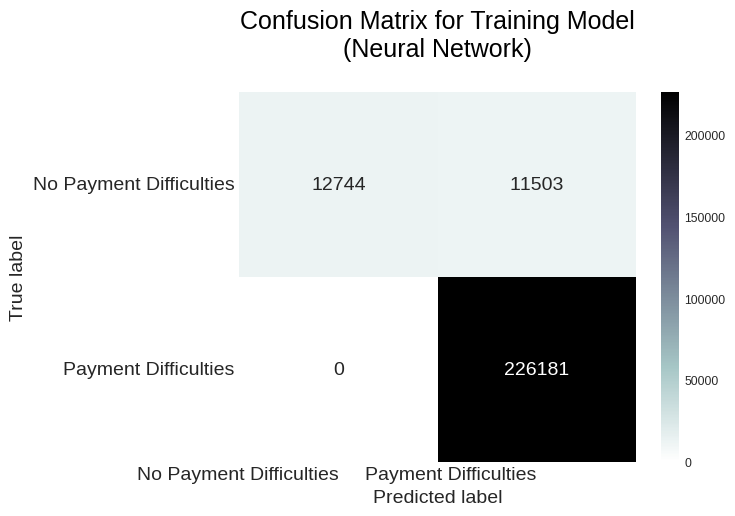

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_nn = pd.DataFrame((confusion_matrix(y_train, y_train_pred_nn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_nn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Neural Network)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
# predit data test
y_test_pred_nn = nn_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Neural Network):')
print(classification_report(y_test, y_test_pred_nn))

Classification Report Testing Model (Neural Network):
              precision    recall  f1-score   support

           0       1.00      0.50      0.67      6102
           1       0.95      1.00      0.97     56505

    accuracy                           0.95     62607
   macro avg       0.97      0.75      0.82     62607
weighted avg       0.95      0.95      0.94     62607



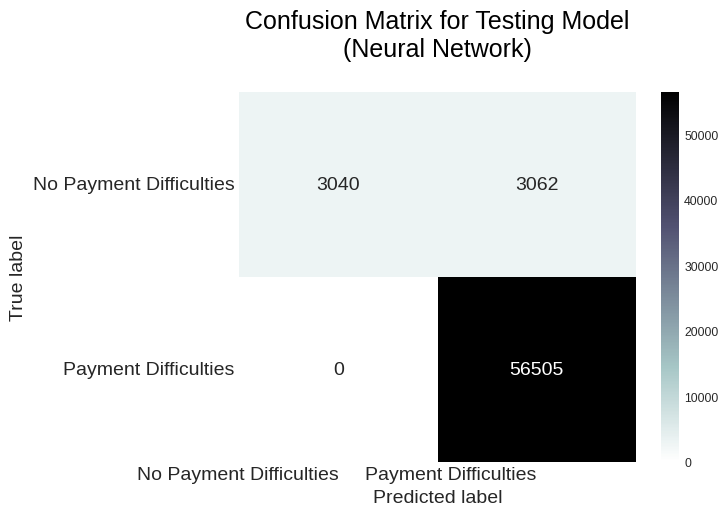

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_nn = pd.DataFrame((confusion_matrix(y_test, y_test_pred_nn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_nn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Neural Network)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
acc_nn_train=round(nn_model.score(X_train,y_train)*100,2)
acc_nn_test=round(nn_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_nn_train))
print("Test Accuracy: % {}".format(acc_nn_test))

Training Accuracy: % 95.41
Test Accuracy: % 95.11


Model Neural Network menghasilkan akurasi sebesar 95,41%. Terdapat error margin sebesar 0,3%



In [ ]:
# ROC scores
roc_auc_nn = round(roc_auc_score(y_test, y_test_pred_nn),4)
print('ROC AUC:', roc_auc_nn)

ROC AUC: 0.7491


## Model Selection

In [ ]:
results = pd.DataFrame([["Logistic Regression", 0.6716, 0.6729, 0.6729],["Gaussian Naive Bayes", 0.6024, 0.6039, 0.604],
                       ["Decision Tree", 1, 0.8826, 0.8826],["Random Forest", 1, 0.9965, 0.9965],
                       ["K-Nearest Neighbor", 0.9156, 0.8807, 0.8806], ["Neural Network", 0.7001, 0.6948, 0.6948]],
                        columns = ["Models", "Training Accuracy Score", "Testing Accuracy Score", "ROC Score"])

results.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=False).style.background_gradient(cmap='Blues')

,Models,Training Accuracy Score,Testing Accuracy Score,ROC Score
3,Random Forest,1.000000,0.996500,0.996500
2,Decision Tree,1.000000,0.882600,0.882600
4,K-Nearest Neighbor,0.915600,0.880700,0.880600
5,Neural Network,0.700100,0.694800,0.694800
0,Logistic Regression,0.671600,0.672900,0.672900
1,Gaussian Naive Bayes,0.602400,0.603900,0.604000


Akurasi prediksi data train dan test pada model Random Forest memiliki nilai yang tidak jauh berbeda, dapat dikatakan model sangat baik yaitu tidak ada underfitting maupun overfitting. Maka model Random Forest dipilih sebagai model terbaik untuk memprediksi kemampuan pembayaran klien.

## Prediction

### Impor Dataset

In [ ]:
# data application (test)
df_test = pd.read_csv("application_test.csv", sep=',')
print('This dataset has %d rows dan %d columns.\n' % df_test.shape)
df_test.head()

This dataset has 32706 rows dan 121 columns.



,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


### Detecting Duplication

In [ ]:
print('The number of duplication is:', df_test.duplicated().sum())
# there is no duplication

The number of duplication is: 0


### Detecting Missing Values

In [ ]:
# check for empty elements
print('Missing values status:', df_test.isnull().values.any())
tvc = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
tvc['Percentage'] = (tvc['Total Null Values']/df_test.shape[0])*100
tvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,COMMONAREA_AVG,22446,68.629609
1,COMMONAREA_MODE,22446,68.629609
2,COMMONAREA_MEDI,22446,68.629609
3,NONLIVINGAPARTMENTS_AVG,22368,68.391121
4,NONLIVINGAPARTMENTS_MODE,22368,68.391121
...,...,...,...
116,NAME_HOUSING_TYPE,0,0.000000
117,NAME_FAMILY_STATUS,0,0.000000
118,NAME_EDUCATION_TYPE,0,0.000000
119,NAME_INCOME_TYPE,0,0.000000


In [ ]:
# drop features that have large number of missing values (± 50%)
df_test.drop(df_test.iloc[:, 43:90], inplace=True, axis=1)
df_test.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)
# after drop some features
print('Missing values status:', df_test.isnull().values.any())
tvc = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
tvc['Percentage'] = (tvc['Total Null Values']/df_test.shape[0])*100
tvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,OCCUPATION_TYPE,10534,32.208158
1,EXT_SOURCE_3,5817,17.785727
2,AMT_REQ_CREDIT_BUREAU_YEAR,4052,12.389164
3,AMT_REQ_CREDIT_BUREAU_QRT,4052,12.389164
4,AMT_REQ_CREDIT_BUREAU_MON,4052,12.389164
...,...,...,...
67,REG_REGION_NOT_LIVE_REGION,0,0.000000
68,REG_REGION_NOT_WORK_REGION,0,0.000000
69,LIVE_REGION_NOT_WORK_REGION,0,0.000000
70,REG_CITY_NOT_LIVE_CITY,0,0.000000


In [ ]:
# impute missing values with median because the data is skewed for numerical features
# impute missing values with mode for categorical features

category_columns = df_test.select_dtypes(include=['object']).columns.tolist()
integer_columns = df_test.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df_test:
    if df_test[column].isnull().any():
        if(column in category_columns):
            df_test[column]=df_test[column].fillna(df_test[column].mode()[0])
        else:
            df_test[column]=df_test[column].fillna(df_test[column].median())
# after imputation
print('Missing values status:', df_test.isnull().values.any())
tvc = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
tvc['Percentage'] = (tvc['Total Null Values']/df_test.shape[0])*100
tvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: False


,index,Total Null Values,Percentage
0,SK_ID_CURR,0,0.0
1,NAME_CONTRACT_TYPE,0,0.0
2,FLAG_DOCUMENT_8,0,0.0
3,FLAG_DOCUMENT_7,0,0.0
4,FLAG_DOCUMENT_6,0,0.0
...,...,...,...
67,FLAG_CONT_MOBILE,0,0.0
68,FLAG_WORK_PHONE,0,0.0
69,FLAG_EMP_PHONE,0,0.0
70,FLAG_MOBIL,0,0.0


### Label Encoding

In [ ]:
# label encoder for object features
df_test[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = df_test[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
# Convert Negative Values to Positive Values
df_test.iloc[:,16:20] = df_test.iloc[:,16:20].abs()
df_test.iloc[:,45] = df_test.iloc[:,45].abs()

### Predicting

In [ ]:
pred_test = df_test[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 
                           'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                          'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                          'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
pred_test.head()

,DAYS_EMPLOYED,AMT_GOODS_PRICE,AMT_CREDIT,DAYS_BIRTH,AMT_INCOME_TOTAL,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,AMT_ANNUITY,ORGANIZATION_TYPE,NAME_INCOME_TYPE,REG_CITY_NOT_WORK_CITY,CODE_GENDER,EXT_SOURCE_2,REG_CITY_NOT_LIVE_CITY,NAME_EDUCATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,LIVE_CITY_NOT_WORK_CITY
0,-2329,450000.0,568800.0,-19241,135000.0,-5170.0,-1740.0,-812,20560.5,28,6,0,0,0.789654,0,1,0.0,0.159520,0.0,0
1,-4469,180000.0,222768.0,-18064,99000.0,-9118.0,0.0,-1623,17370.0,42,6,0,1,0.291656,0,4,0.0,0.432962,0.0,0
2,-4458,630000.0,663264.0,-20038,202500.0,-2175.0,-856.0,-3503,69777.0,54,6,0,1,0.699787,0,1,0.0,0.610991,0.0,0
3,-1866,1575000.0,1575000.0,-13976,315000.0,-2000.0,-1805.0,-4208,49018.5,5,6,0,0,0.509677,0,4,0.0,0.612704,0.0,0
4,-2191,625500.0,625500.0,-13040,180000.0,-4000.0,-821.0,-4262,32067.0,5,6,1,1,0.425687,0,4,0.0,0.517297,0.0,1


In [ ]:
# lets predict!
predict = pd.Series(rf_model.predict(pred_test), name = "TARGET").astype(int)
results = pd.concat([df_test['SK_ID_CURR'], predict],axis = 1)
results.to_csv("predict application.csv", index = False)
results.head()

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0


## Recommendation

Klien dengan tipe penghasilan mahasiswa dapat dikatakan sebagai klien yang mampu membayar kembali pinjaman baik dengan pinjaman tunai atau pinjaman bergulir (100% dari aplikasi disetujui). Namun hanya 0,005% aplikasi yang berasal dari siswa. Klien yang berprofesi sebagai akuntan dapat dikatakan sebagai klien yang mampu membayar kembali pinjaman (95% dari aplikasi disetujui). Tapi, hanya ada 3,19% aplikasi berasal dari akuntan. Begitu juga, klien yang bekerja sebagai staf teknologi keterampilan tinggi dan
manajer, mereka mampu membayar kembali pinjaman, tetapi hanya ada beberapa aplikasi yang berasal dari mereka.

Jadi, perlu dilakukan promosi agar lebih banyak siswa, akuntan, staf teknologi tinggi, dan manajer tertarik untuk mengajukan pinjaman.

Klien dengan cuti melahirkan dan pinjaman tunai dapat dikatakan sebagai klien yang tidak mampu membayar kembali pinjaman (100% aplikasi ditolak). 
Untuk klien yang menganggur, lebih dari 50% dari mereka memiliki masalah dalam membayar kembali pinjamannya jika mereka mengambil kontrak pinjaman tunai. Sementara itu, semua klien menganggur yang mengambil pinjaman bergulir (revolving loans) mampu mengembalikan pinjaman.

Jadi, perlu analisis lebih lanjut untuk mengetahui apakah ada masalah jika klien yang mengambil cuti melahirkan atau menganggur mengambil kontrak pinjaman tunai. Jadi, di masa depan, jika ada klien dengan jenis pendapatan seperti itu, perusahaan dapat merekomendasikan jenis kontrak yang tepat agar mereka aplikasi akan disetujui.




# EVALUATION

In [ ]:
# mse, mape